# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/1363396194_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/900298796_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/247162961_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/1890266440_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/1863655430_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/141110631_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.2.json
Using /home/ashinde/PhD/CaffineBraver

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/1363396194_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]


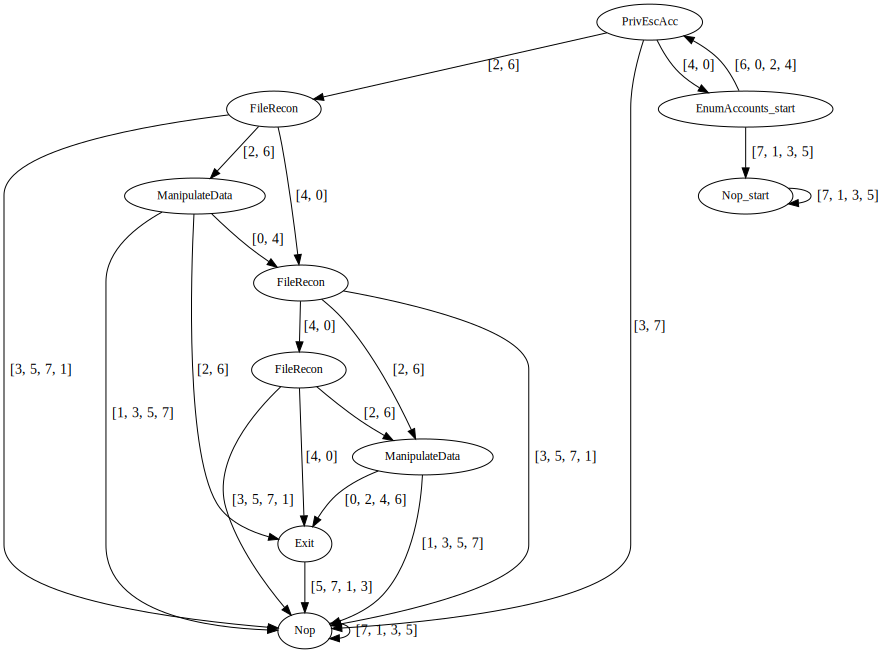

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/900298796_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]


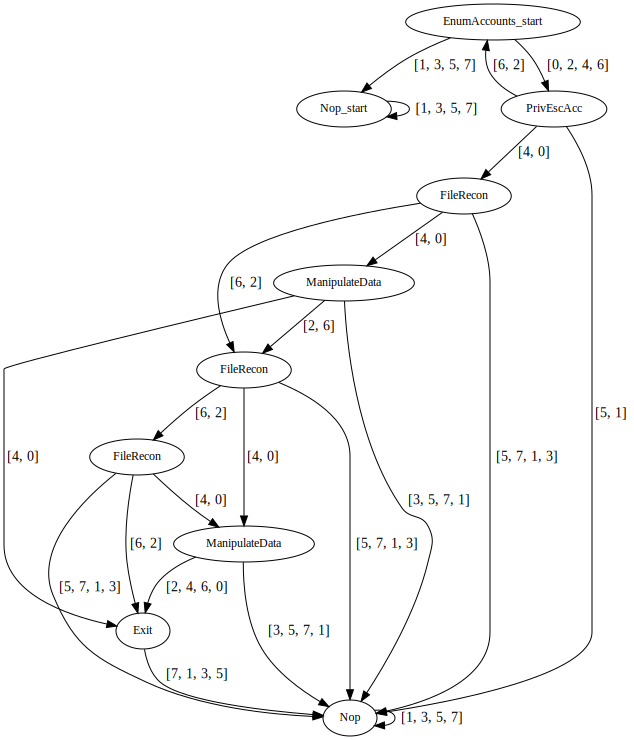

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/247162961_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


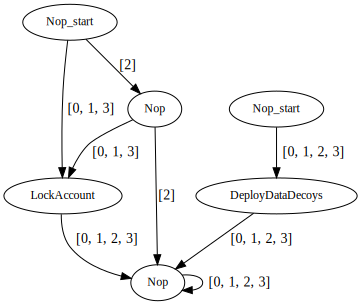

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/1890266440_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


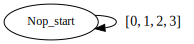

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/1863655430_attl2_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
2:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


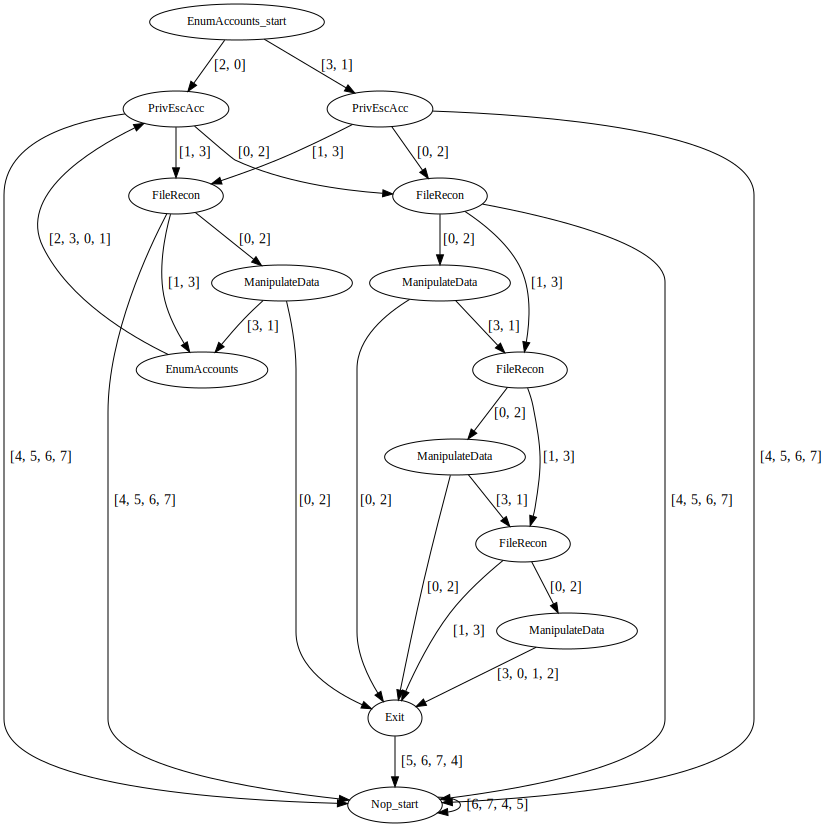

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/141110631_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


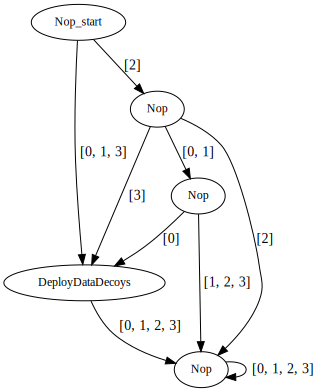

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic/results_l3_fae/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/result

+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                         su_login
1                               1.0                         su_login
2                               1.0                             none
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

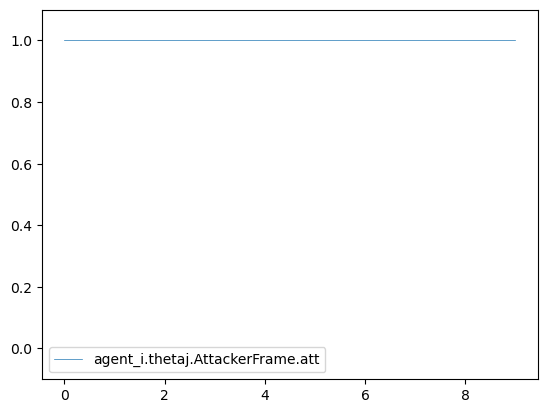

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.354839                        0.645161   
3                         0.186435                        0.813565   
4                         0.411805                        0.588195   
5                         0.501136                        0.498864   
6                         0.501136                        0.498864   
7                         0.501136                        0.498864   
8                         0.501136                        0.498864   
9                         0.501136                        0.498864   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

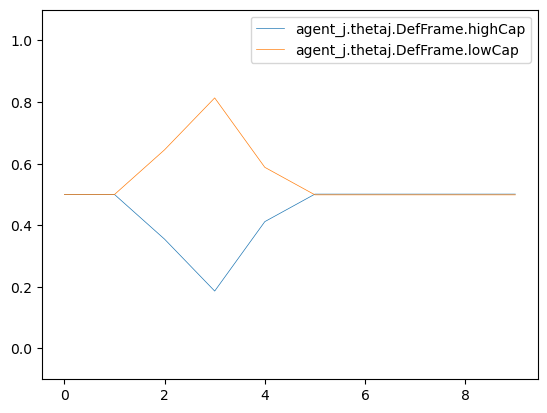

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

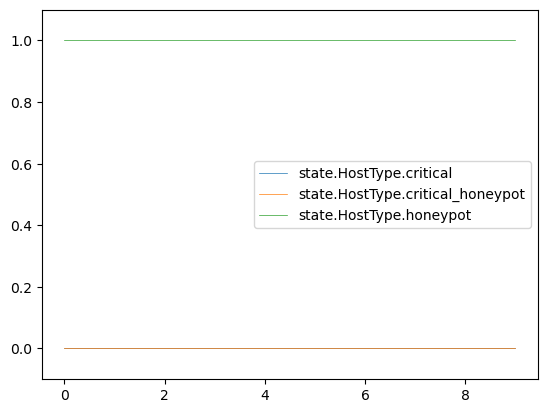

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                         su_login  
1                         su_login  
2                             none  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

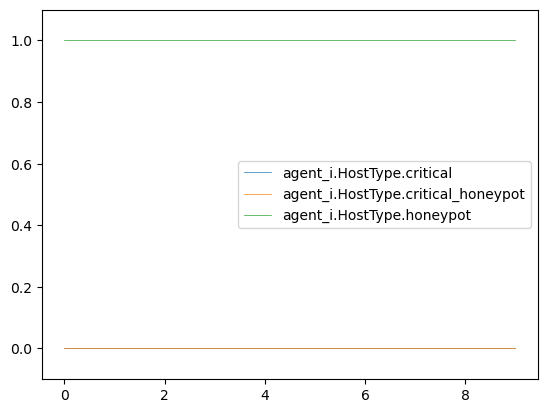

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc  DeployDataDecoys   
2                        0.0       FileRecon               Nop   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                         none                           success   
7                         none                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

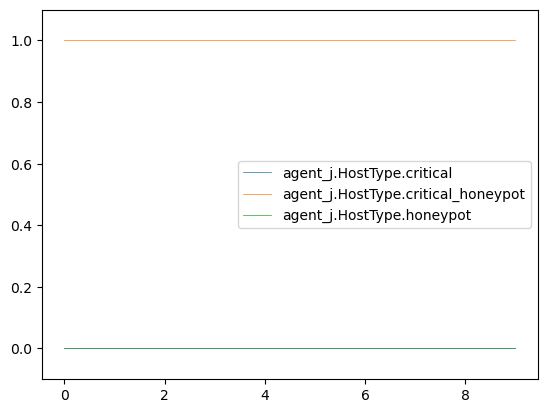

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

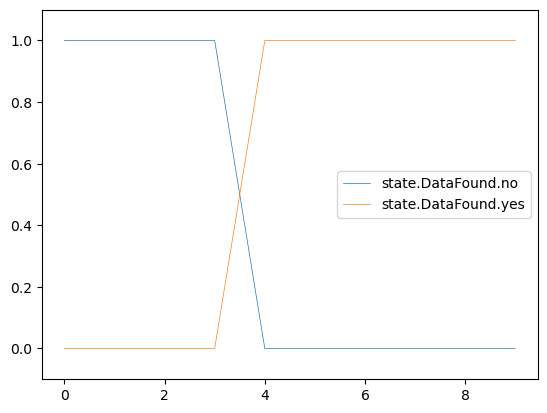

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.604000               0.396000               Nop   
4              0.185951               0.814049               Nop   
5              0.166744               0.833256               Nop   
6              0.166365               0.833635               Nop   
7              0.166349               0.833651               Nop   
8              0.166349               0.833651               Nop   
9              0.166349               0.833651               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

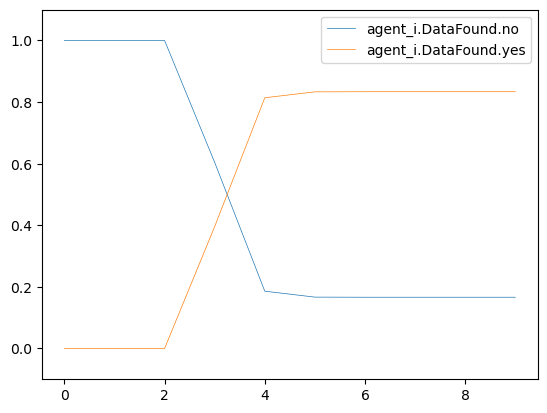

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.887512               0.112489       FileRecon   
4              0.194626               0.805374  ManipulateData   
5              0.000242               0.999758            Exit   
6              0.000242               0.999758             Nop   
7              0.000242               0.999758             Nop   
8              0.000242               0.999758             Nop   
9              0.000242               0.999758             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

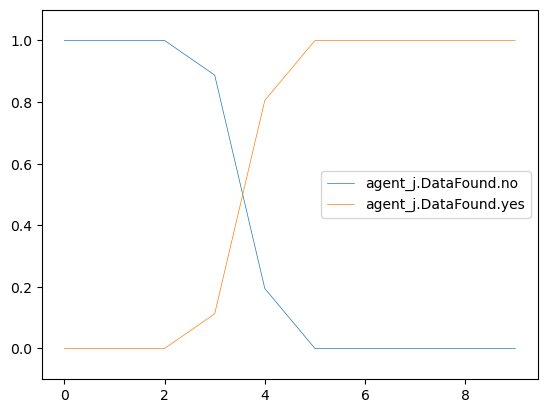

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

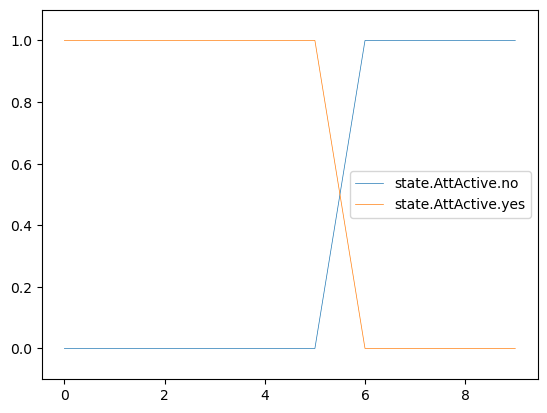

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000           5.000000e-01               Nop   
1              0.500000           5.000000e-01  DeployDataDecoys   
2              0.125000           8.749999e-01               Nop   
3              0.500000           5.000001e-01               Nop   
4              0.156211           8.437890e-01               Nop   
5              0.990148           9.852108e-03               Nop   
6              0.999298           7.022089e-04               Nop   
7              0.999975           2.465422e-05               Nop   
8              0.999999           8.245935e-07               Nop   
9              1.000000           2.734979e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

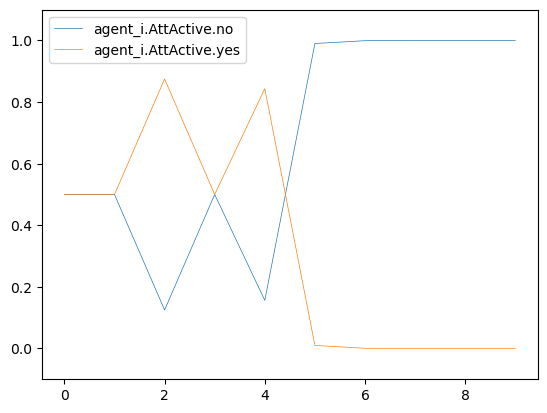

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

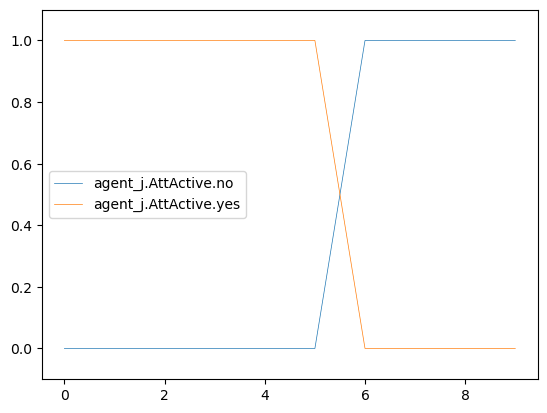

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

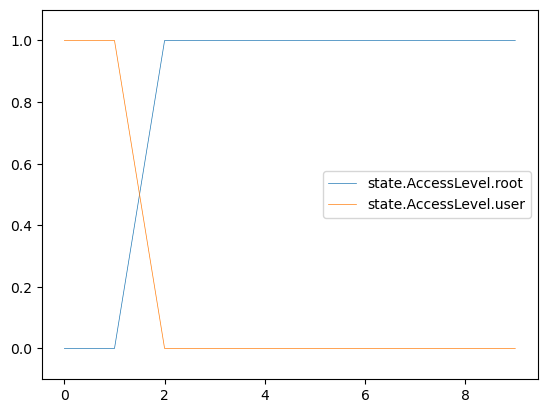

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000  DeployDataDecoys   
2                  0.866250                  0.133750               Nop   
3                  0.495000                  0.505000               Nop   
4                  0.841290                  0.158710               Nop   
5                  0.834386                  0.165614               Nop   
6                  0.833856                  0.166144               Nop   
7                  0.833832                  0.166168               Nop   
8                  0.833831                  0.166169               Nop   
9                  0.833831                  0.166169               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

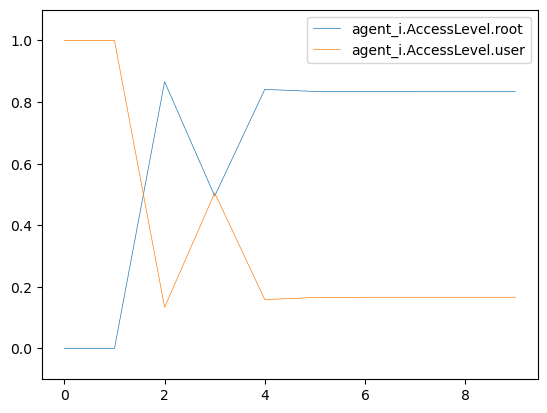

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.999909                  0.000091       FileRecon   
3                  0.999868                  0.000132       FileRecon   
4                  0.999930                  0.000070  ManipulateData   
5                  0.999954                  0.000046            Exit   
6                  0.999954                  0.000046             Nop   
7                  0.999954                  0.000046             Nop   
8                  0.999954                  0.000046             Nop   
9                  0.999954                  0.000046             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

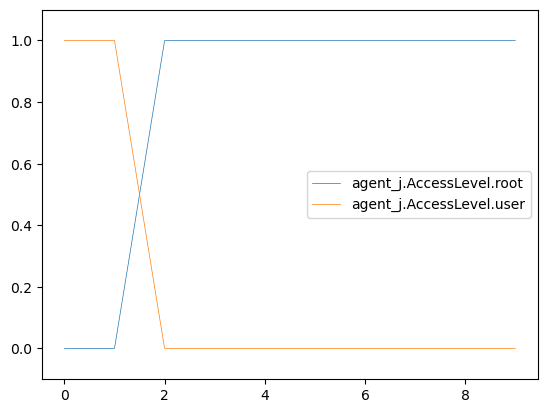

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

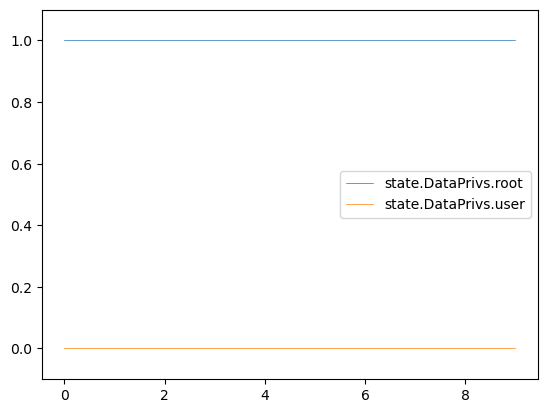

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

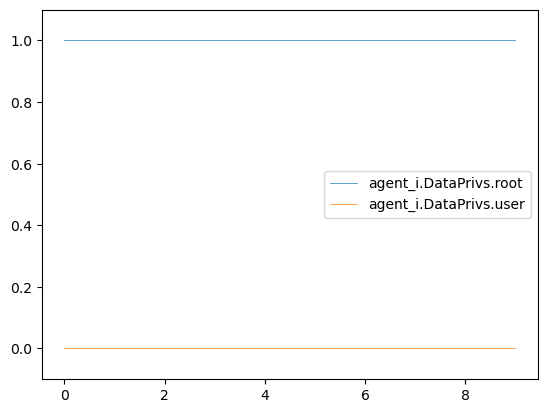

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.500020                0.499980       FileRecon   
4                0.499989                0.500010  ManipulateData   
5                0.499977                0.500023            Exit   
6                0.499977                0.500023             Nop   
7                0.499977                0.500023             Nop   
8                0.499977                0.500023             Nop   
9                0.499977                0.500023             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

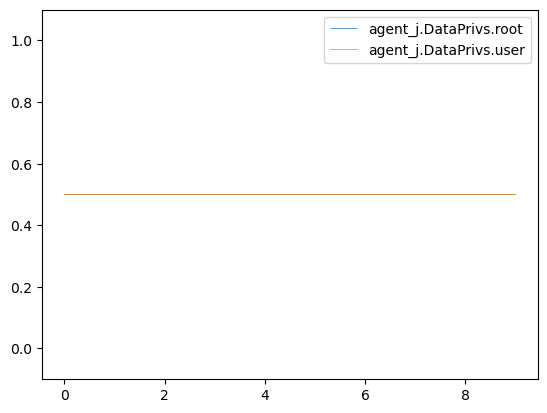

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

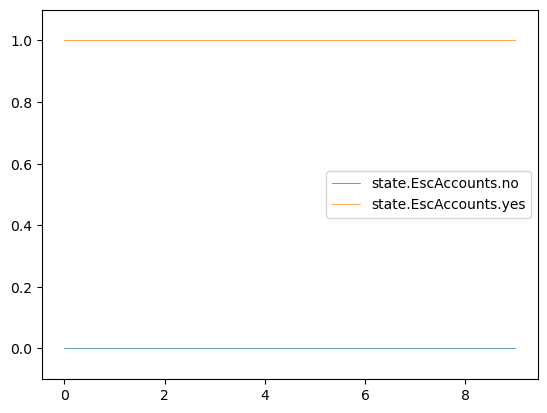

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

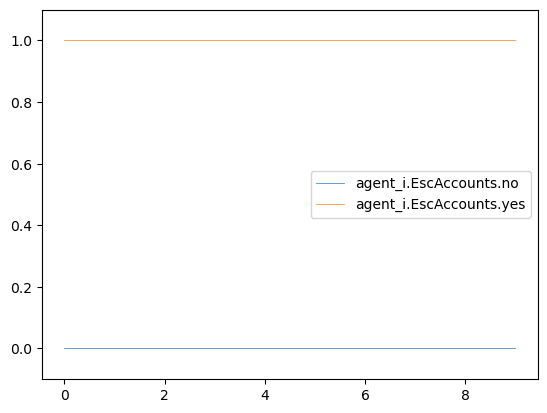

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

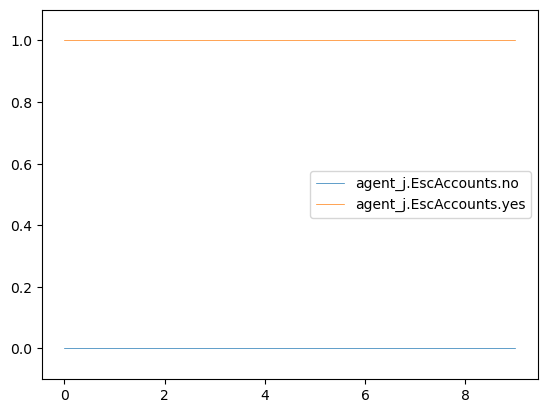

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

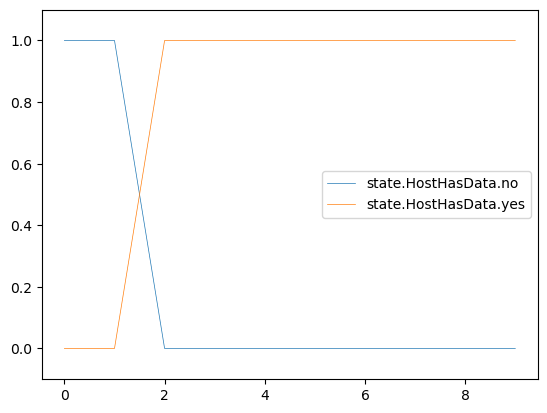

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

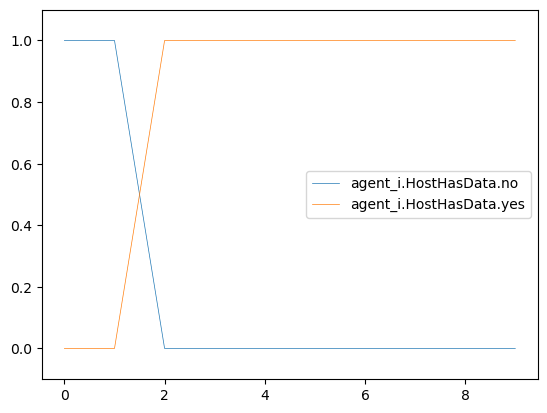

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.338710                 0.661290       FileRecon   
3                0.634355                 0.365645       FileRecon   
4                0.180228                 0.819772  ManipulateData   
5                0.000224                 0.999776            Exit   
6                0.000224                 0.999776             Nop   
7                0.000224                 0.999776             Nop   
8                0.000224                 0.999776             Nop   
9                0.000224                 0.999776             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

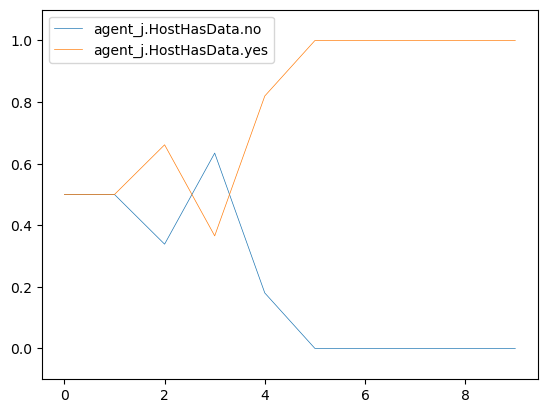

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

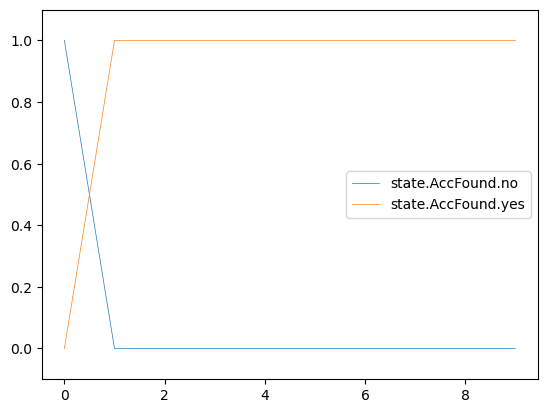

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.505000              0.495000  DeployDataDecoys   
2             0.133750              0.866250               Nop   
3             0.505000              0.495000               Nop   
4             0.157320              0.842680               Nop   
5             0.165450              0.834550               Nop   
6             0.166144              0.833856               Nop   
7             0.166168              0.833832               Nop   
8             0.166169              0.833831               Nop   
9             0.166169              0.833831               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

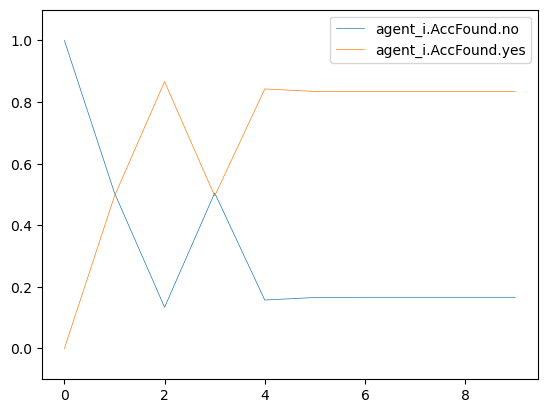

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.083333              0.916667      PrivEscAcc   
2             0.000091              0.999909       FileRecon   
3             0.000132              0.999868       FileRecon   
4             0.000070              0.999930  ManipulateData   
5             0.000046              0.999954            Exit   
6             0.000046              0.999954             Nop   
7             0.000046              0.999954             Nop   
8             0.000046              0.999954             Nop   
9             0.000046              0.999954             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

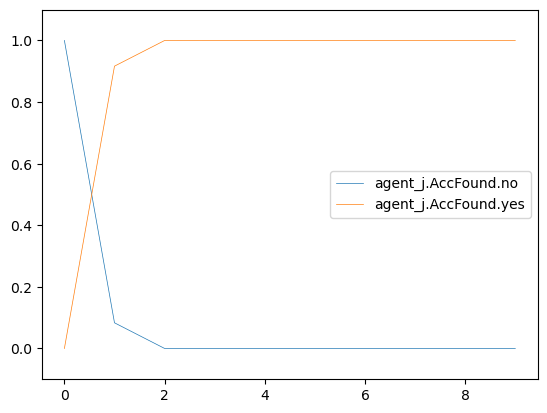

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

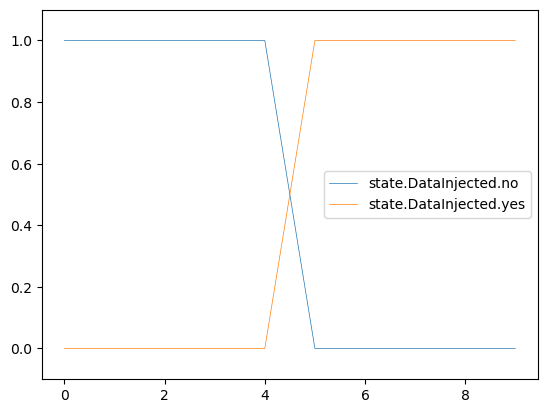

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.220570                  0.779430               Nop   
5                 0.170491                  0.829509               Nop   
6                 0.166618                  0.833382               Nop   
7                 0.166479                  0.833521               Nop   
8                 0.166474                  0.833526               Nop   
9                 0.166474                  0.833526               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                             none  
3       FileRecon                       file_write  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

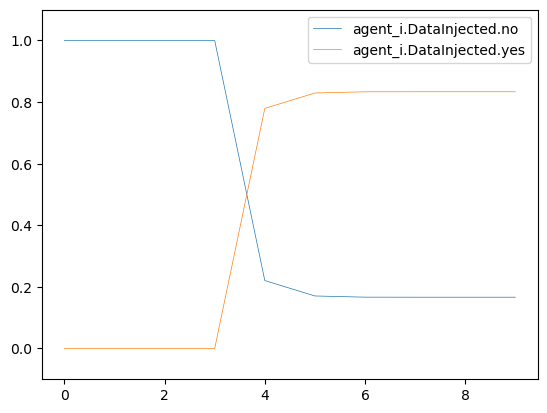

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000242                  0.999758            Exit   
6                 0.000242                  0.999758             Nop   
7                 0.000242                  0.999758             Nop   
8                 0.000242                  0.999758             Nop   
9                 0.000242                  0.999758             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

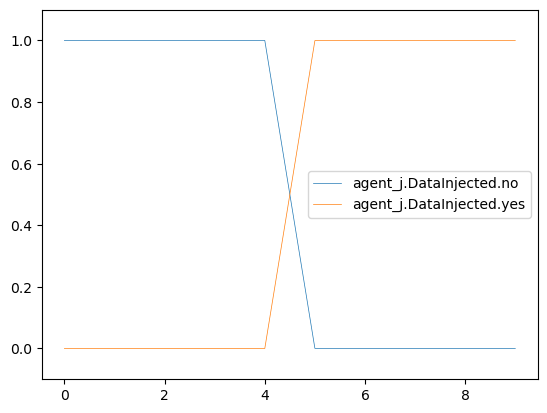

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                         su_login
5                               1.0                         su_login
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

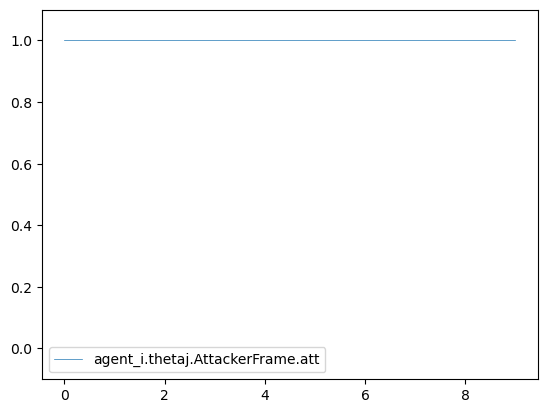

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.354839                        0.645161   
3                         0.186422                        0.813578   
4                         0.063993                        0.936007   
5                         0.263463                        0.736537   
6                         0.013287                        0.986713   
7                         0.013287                        0.986713   
8                         0.013287                        0.986713   
9                         0.013287                        0.986713   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                         none                           failure   
4                         none                           success   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

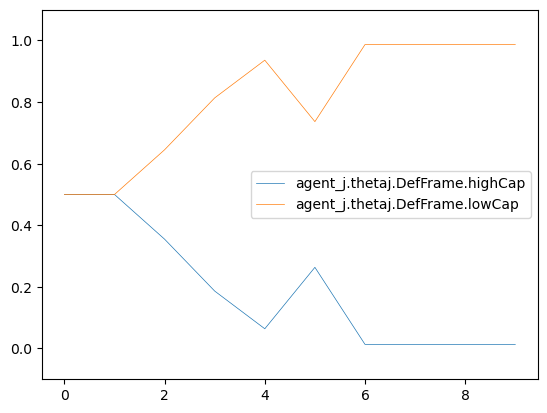

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0               Nop      PrivEscAcc  
2                      1.0  DeployDataDecoys       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

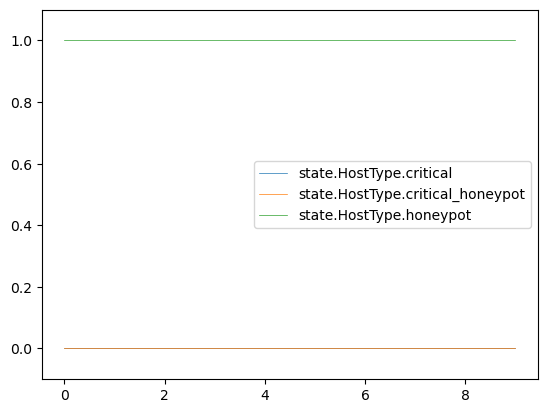

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0               Nop      PrivEscAcc   
2                        1.0  DeployDataDecoys       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                         su_login  
2                        file_enum  
3                        file_enum  
4                         su_login  
5                         su_login  
6                             none  
7                             none  
8                             none  
9                             none

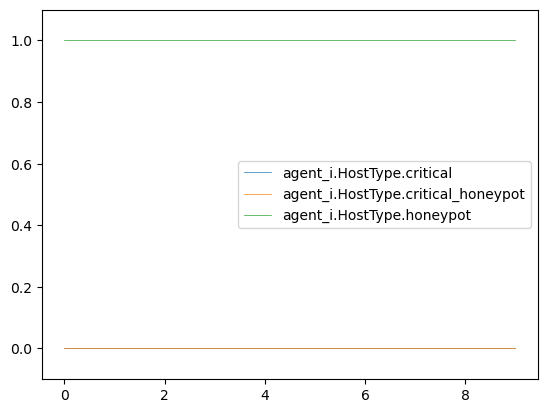

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc               Nop   
2                        0.0       FileRecon  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                         none                           failure   
3                         none                           failure   
4                         none                           success   
5                   user_files                           failure   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

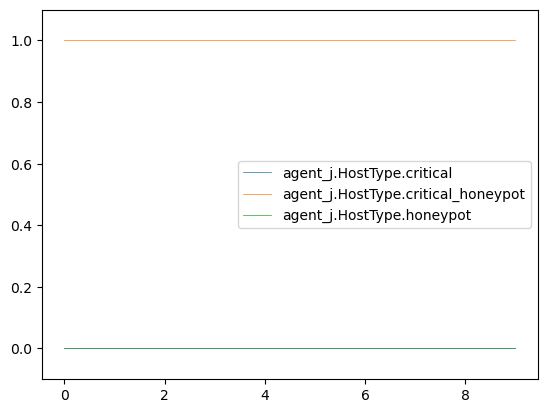

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0               Nop      PrivEscAcc
2                 1.0                  0.0  DeployDataDecoys       FileRecon
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 1.0                  0.0               Nop  ManipulateData
6                 1.0                  0.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

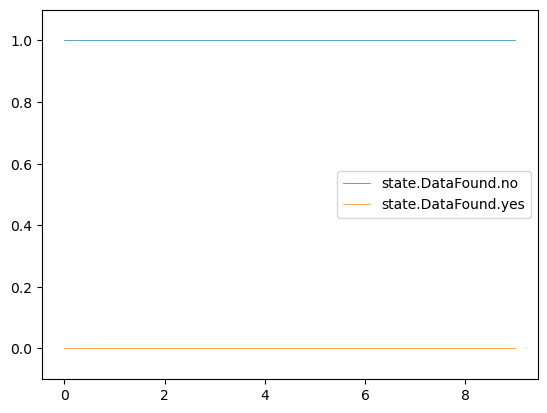

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.238160               0.761840               Nop   
5              0.143293               0.856707               Nop   
6              0.072644               0.927356               Nop   
7              0.061825               0.938175               Nop   
8              0.061304               0.938696               Nop   
9              0.061283               0.938717               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

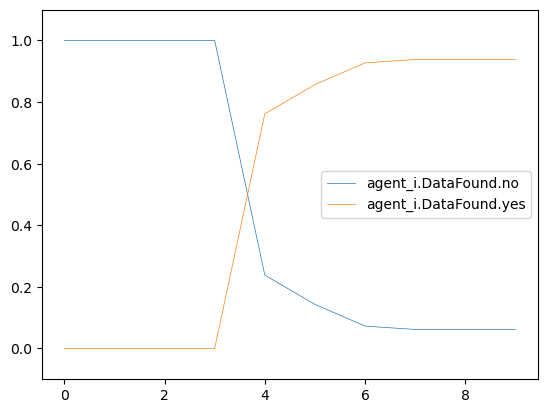

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.887502               0.112498       FileRecon   
4              0.951390               0.048610       FileRecon   
5              0.486789               0.513211  ManipulateData   
6              0.998946               0.001054            Exit   
7              0.998946               0.001054             Nop   
8              0.998946               0.001054             Nop   
9              0.998946               0.001054             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

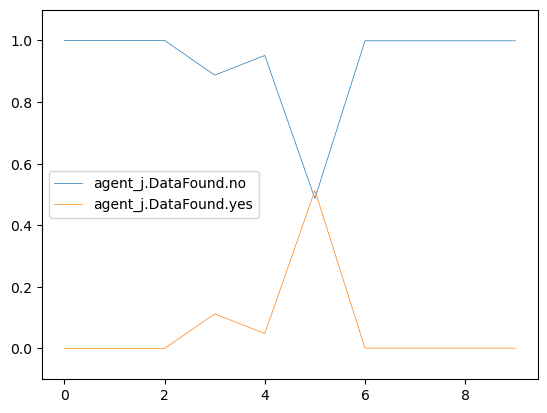

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0               Nop      PrivEscAcc
2                 0.0                  1.0  DeployDataDecoys       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

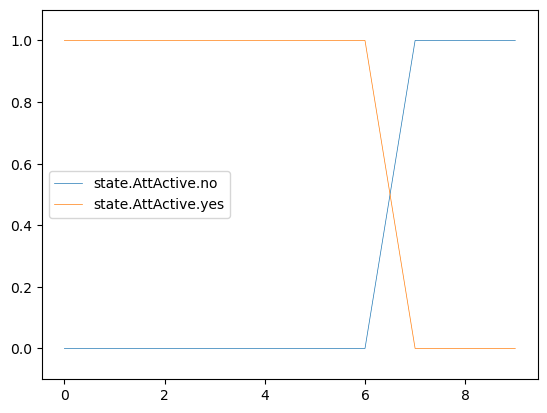

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000               0.500000               Nop   
1              0.875000               0.125000               Nop   
2              0.500000               0.500000  DeployDataDecoys   
3              0.125000               0.875000               Nop   
4              0.021834               0.978166               Nop   
5              0.020546               0.979454               Nop   
6              0.713081               0.286919               Nop   
7              0.986463               0.013537               Nop   
8              0.999529               0.000471               Nop   
9              0.999982               0.000018               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

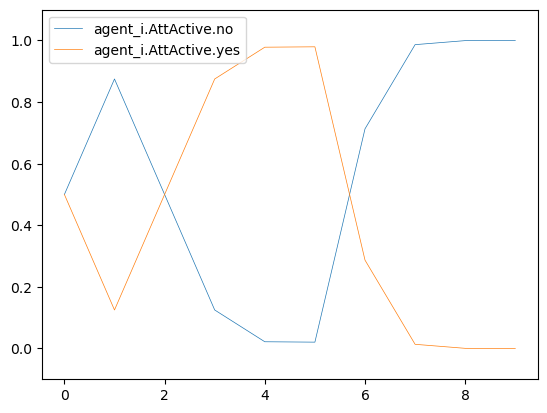

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

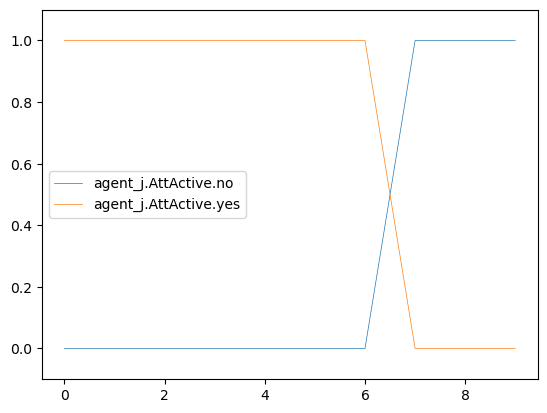

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

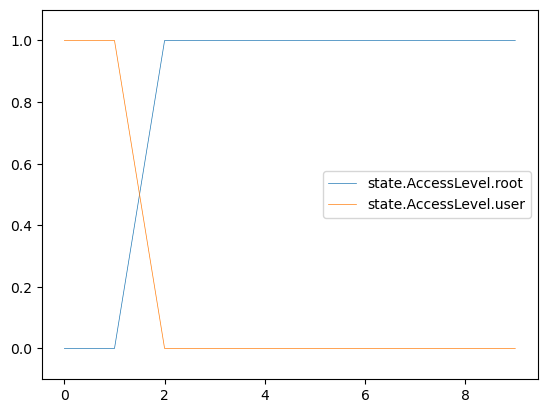

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.495000                  0.505000  DeployDataDecoys   
3                  0.866250                  0.133750               Nop   
4                  0.968384                  0.031616               Nop   
5                  0.978683                  0.021318               Nop   
6                  0.978836                  0.021164               Nop   
7                  0.977712                  0.022288               Nop   
8                  0.977747                  0.022253               Nop   
9                  0.977747                  0.022253               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

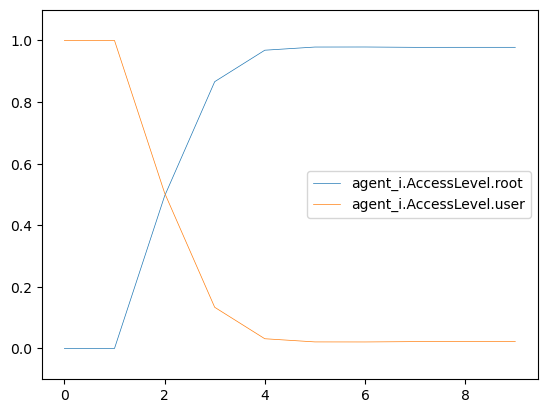

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.999999                  0.000001       FileRecon   
3                  0.999998                  0.000002       FileRecon   
4                  0.999998                  0.000002       FileRecon   
5                  0.999999                  0.000001  ManipulateData   
6                  0.999998                  0.000002            Exit   
7                  0.999998                  0.000002             Nop   
8                  0.999998                  0.000002             Nop   
9                  0.999998                  0.000002             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

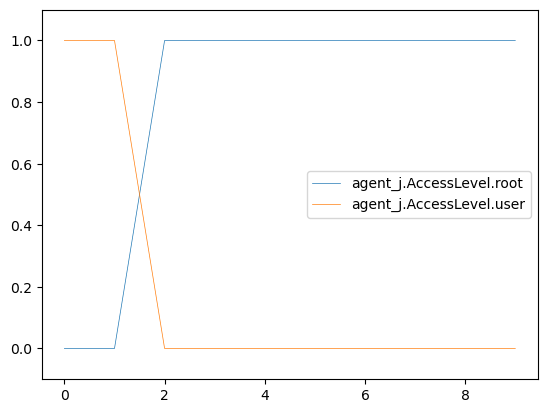

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

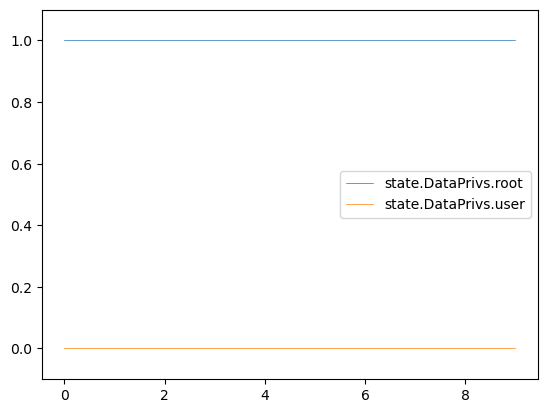

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

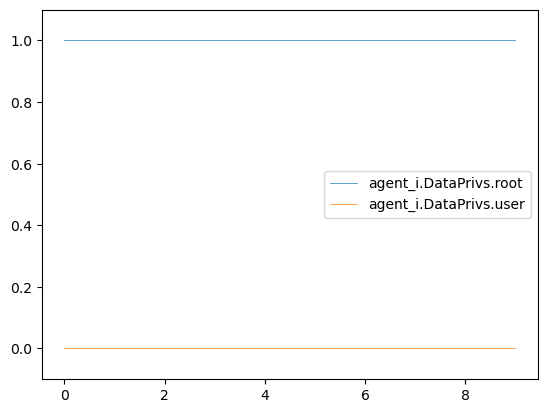

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.500000                0.500000       FileRecon   
4                0.500000                0.500000       FileRecon   
5                0.500000                0.500000  ManipulateData   
6                0.500001                0.499999            Exit   
7                0.500001                0.499999             Nop   
8                0.500001                0.499999             Nop   
9                0.500001                0.499999             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

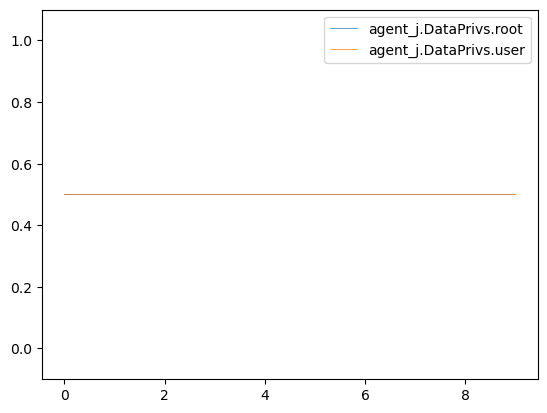

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

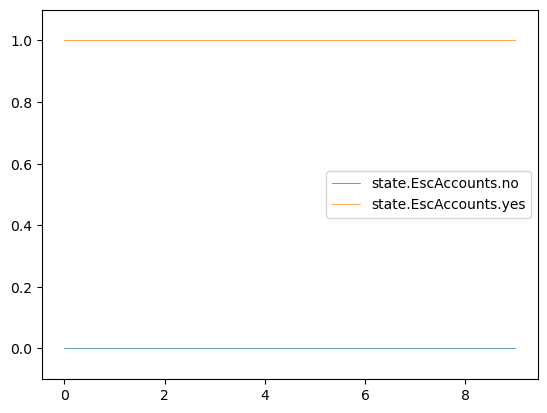

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

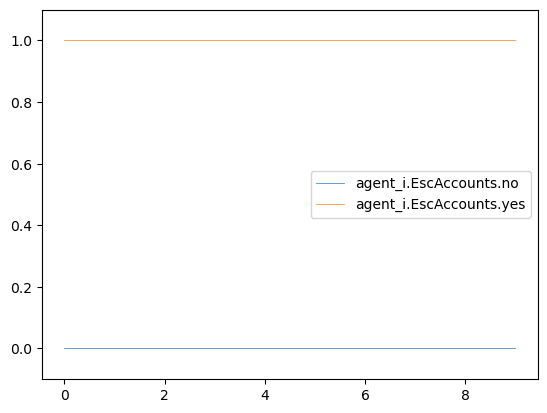

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0       FileRecon   
5                     0.0                      1.0  ManipulateData   
6                     0.0                      1.0            Exit   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

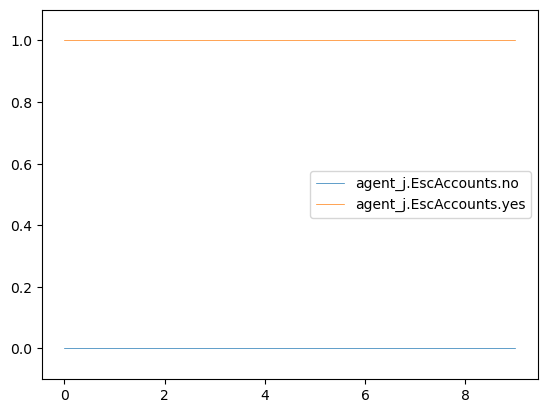

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

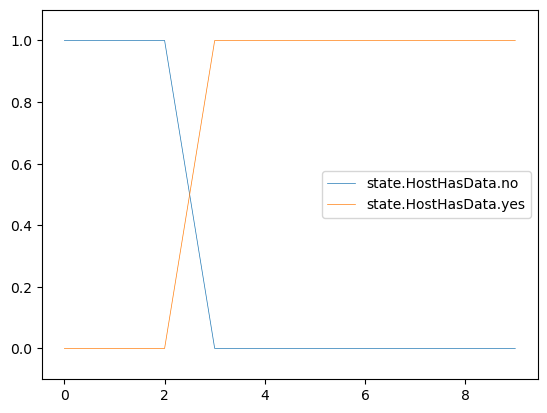

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

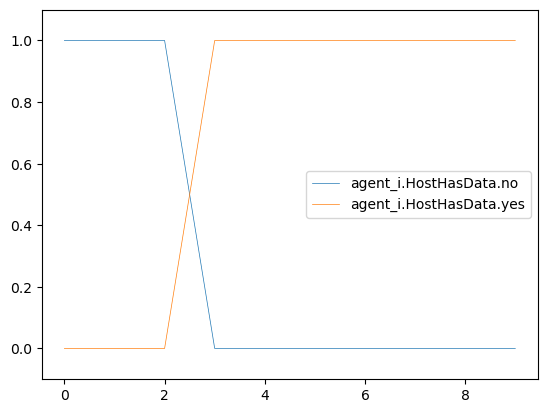

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.338710                 0.661290       FileRecon   
3                0.634380                 0.365620       FileRecon   
4                0.881078                 0.118922       FileRecon   
5                0.479141                 0.520859  ManipulateData   
6                0.983252                 0.016748            Exit   
7                0.983252                 0.016748             Nop   
8                0.983252                 0.016748             Nop   
9                0.983252                 0.016748             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

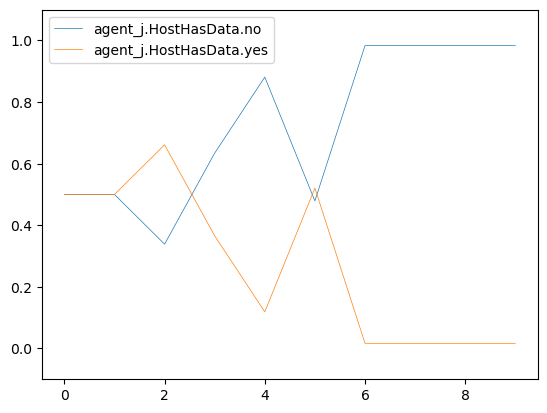

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0               Nop      PrivEscAcc
2                0.0                 1.0  DeployDataDecoys       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

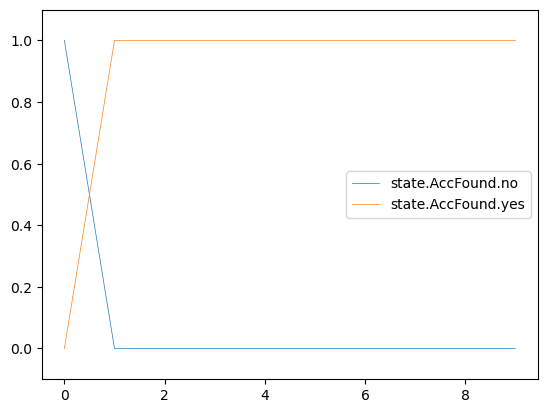

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.876250              0.123750               Nop   
2             0.505000              0.495000  DeployDataDecoys   
3             0.133750              0.866250               Nop   
4             0.022093              0.977907               Nop   
5             0.021176              0.978824               Nop   
6             0.021164              0.978836               Nop   
7             0.022201              0.977800               Nop   
8             0.022251              0.977749               Nop   
9             0.022253              0.977747               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

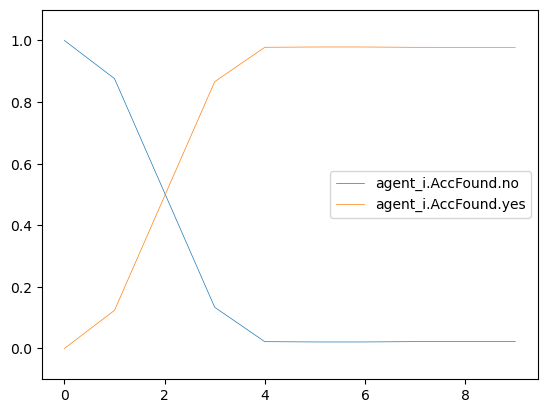

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.001121              0.998879      PrivEscAcc   
2             0.000001              0.999999       FileRecon   
3             0.000002              0.999998       FileRecon   
4             0.000002              0.999998       FileRecon   
5             0.000001              0.999999  ManipulateData   
6             0.000002              0.999998            Exit   
7             0.000002              0.999998             Nop   
8             0.000002              0.999998             Nop   
9             0.000002              0.999998             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

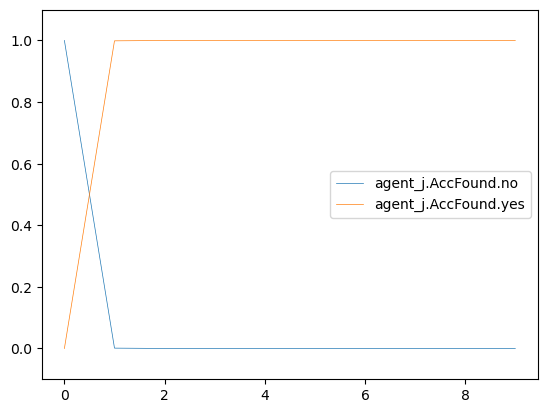

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

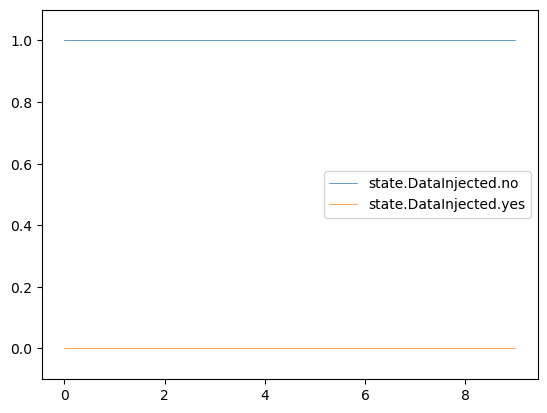

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.355244                  0.644756               Nop   
6                 0.165278                  0.834722               Nop   
7                 0.087935                  0.912065               Nop   
8                 0.085035                  0.914965               Nop   
9                 0.084924                  0.915076               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4       FileRecon                         su_login  
5  ManipulateData                         su_login  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

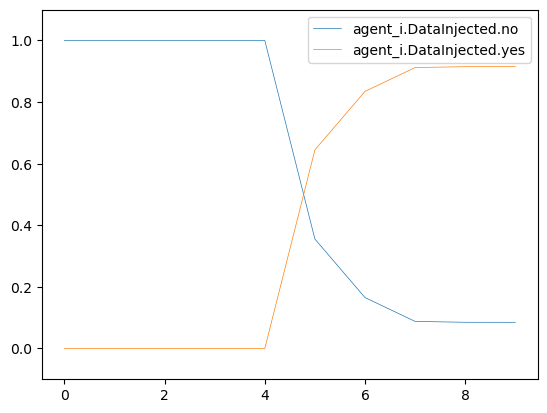

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.998946                  0.001054            Exit   
7                 0.998946                  0.001054             Nop   
8                 0.998946                  0.001054             Nop   
9                 0.998946                  0.001054             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

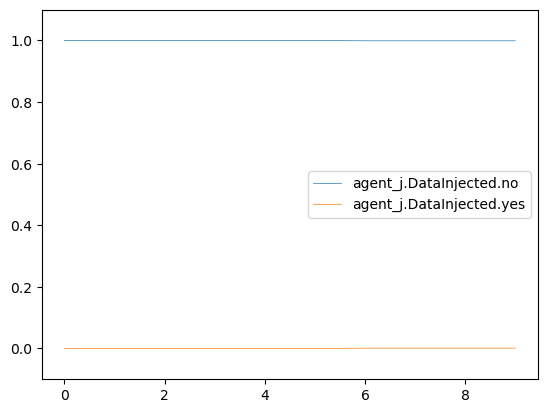

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                       file_write
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

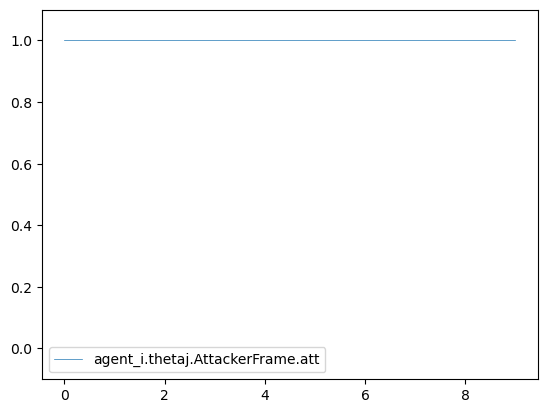

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.354839                        0.645161   
3                         0.469764                        0.530236   
4                         0.501212                        0.498788   
5                         0.501212                        0.498788   
6                         0.501212                        0.498788   
7                         0.501212                        0.498788   
8                         0.501212                        0.498788   
9                         0.501212                        0.498788   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

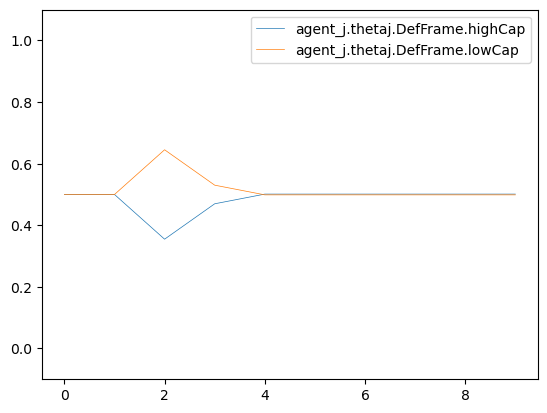

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop  ManipulateData  
4                      1.0               Nop            Exit  
5                      1.0               Nop             Nop  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

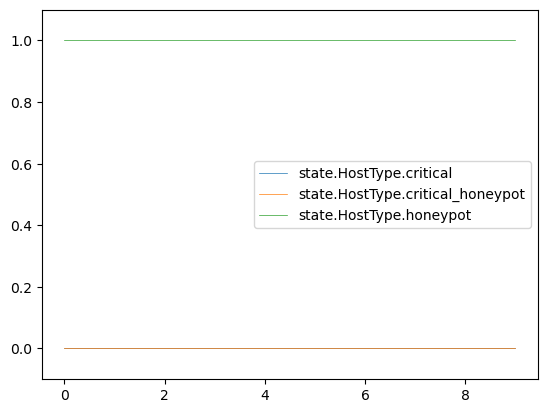

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop  ManipulateData   
4                        1.0               Nop            Exit   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                       file_write  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

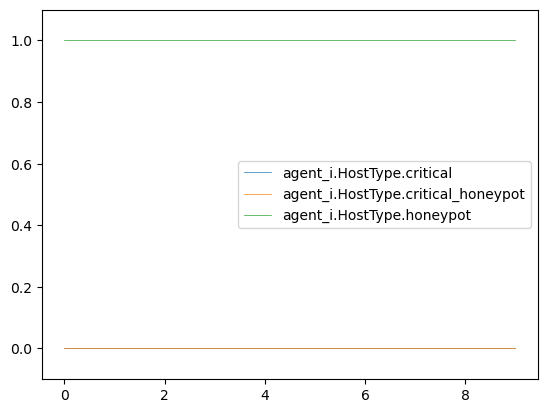

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc  DeployDataDecoys   
2                        0.0       FileRecon               Nop   
3                        0.0  ManipulateData               Nop   
4                        0.0            Exit               Nop   
5                        0.0             Nop               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           success   
2                         none                           success   
3                   user_files                           success   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

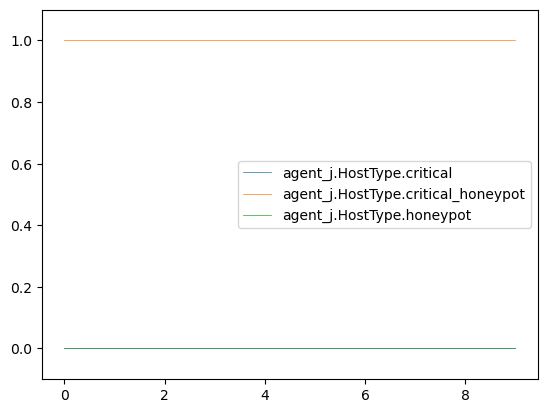

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 0.0                  1.0               Nop             Nop
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

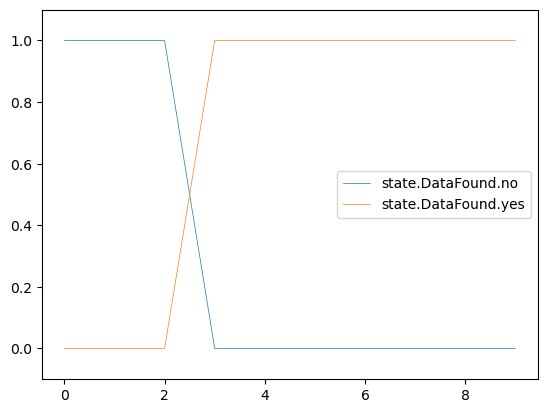

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.223840               0.776160               Nop   
4              0.038877               0.961123               Nop   
5              0.005580               0.994420               Nop   
6              0.004316               0.995684               Nop   
7              0.004268               0.995732               Nop   
8              0.004268               0.995732               Nop   
9              0.004267               0.995733               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

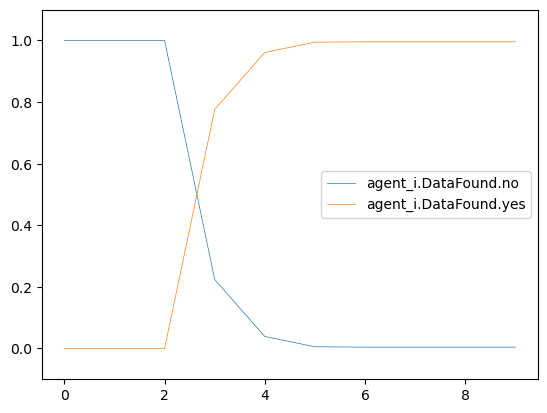

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.088752               0.911249  ManipulateData   
4              0.000097               0.999903            Exit   
5              0.000097               0.999903             Nop   
6              0.000097               0.999903             Nop   
7              0.000097               0.999903             Nop   
8              0.000097               0.999903             Nop   
9              0.000097               0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

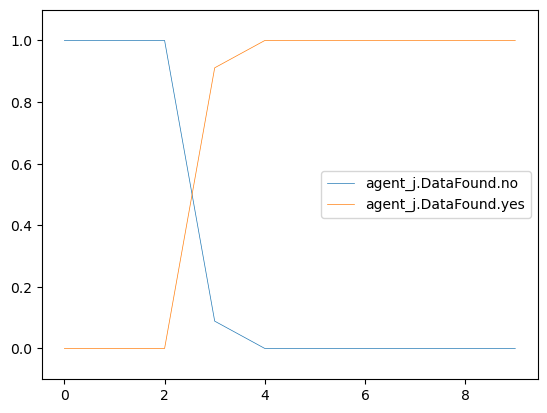

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 1.0                  0.0               Nop             Nop
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

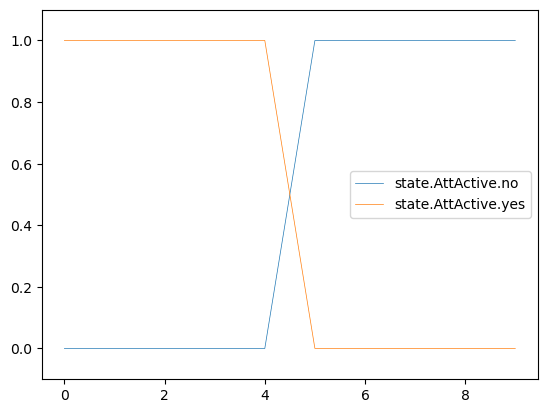

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000           5.000000e-01               Nop   
1              0.125000           8.749999e-01  DeployDataDecoys   
2              0.020000           9.800001e-01               Nop   
3              0.020000           9.800002e-01               Nop   
4              0.003764           9.962361e-01               Nop   
5              0.988242           1.175765e-02               Nop   
6              0.999161           8.387103e-04               Nop   
7              0.999971           2.944757e-05               Nop   
8              0.999961           3.896972e-05               Nop   
9              1.000000           3.216442e-07               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

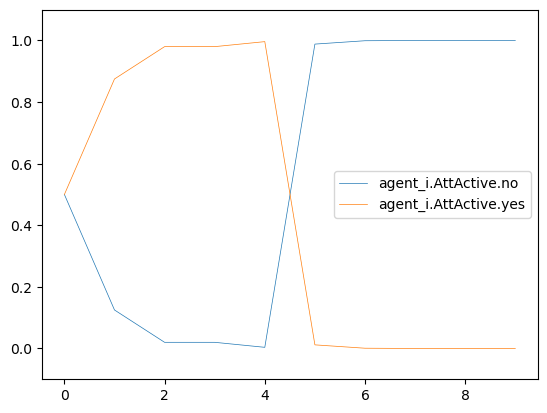

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0  ManipulateData   
4                   0.0                    1.0            Exit   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

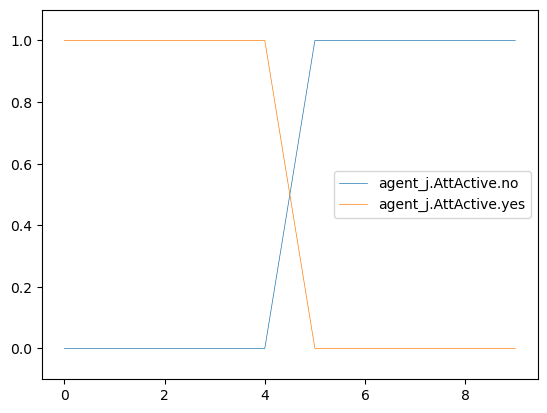

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

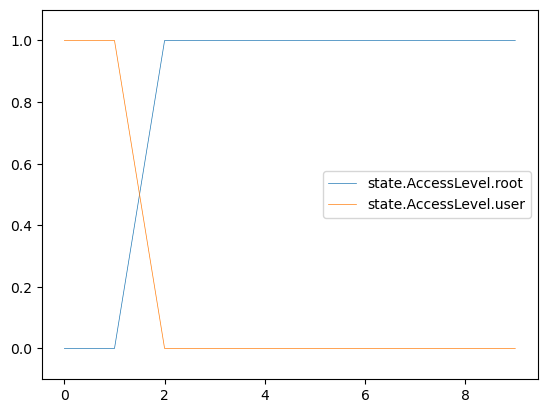

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000  DeployDataDecoys   
2                  0.970200                  0.029800               Nop   
3                  0.970200                  0.029800               Nop   
4                  0.993285                  0.006715               Nop   
5                  0.995769                  0.004231               Nop   
6                  0.995948                  0.004052               Nop   
7                  0.995948                  0.004052               Nop   
8                  0.995948                  0.004052               Nop   
9                  0.995948                  0.004052               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

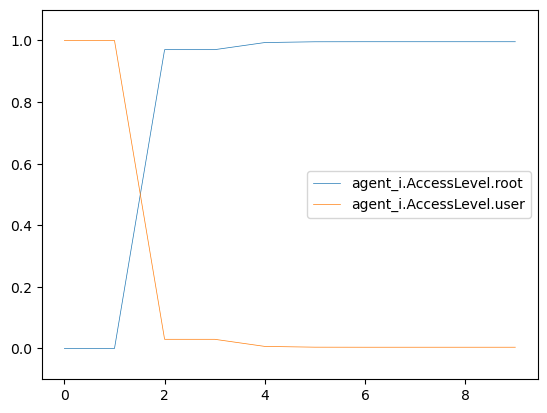

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00    EnumAccounts   
1                  0.000000              1.000000e+00      PrivEscAcc   
2                  0.999999              1.123457e-06       FileRecon   
3                  0.999999              6.684578e-07  ManipulateData   
4                  0.999999              5.618459e-07            Exit   
5                  0.999999              5.618459e-07             Nop   
6                  0.999999              5.618459e-07             Nop   
7                  0.999999              5.618459e-07             Nop   
8                  0.999999              5.618459e-07             Nop   
9                  0.999999              5.618459e-07             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

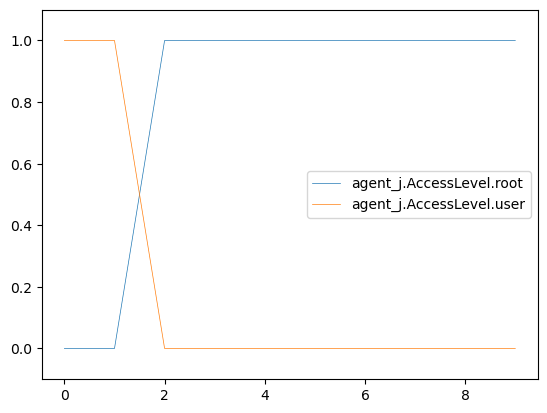

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

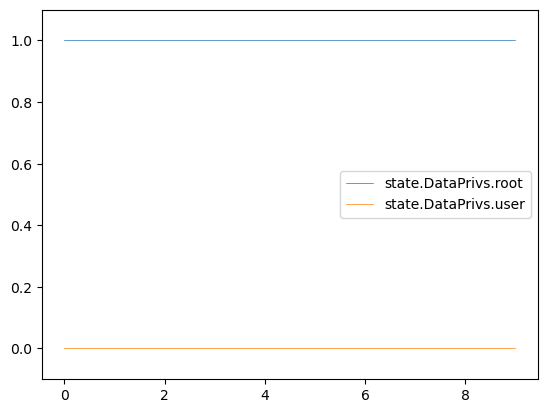

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

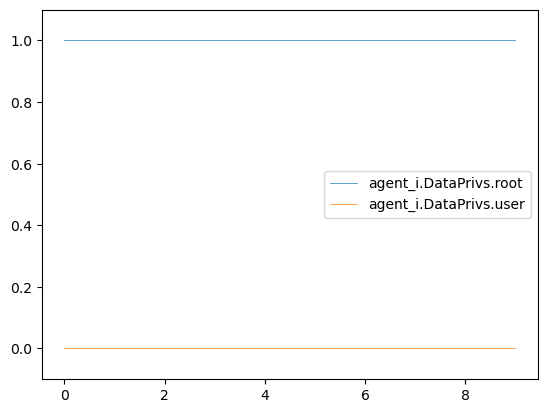

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                     0.5                     0.5    EnumAccounts   
1                     0.5                     0.5      PrivEscAcc   
2                     0.5                     0.5       FileRecon   
3                     0.5                     0.5  ManipulateData   
4                     0.5                     0.5            Exit   
5                     0.5                     0.5             Nop   
6                     0.5                     0.5             Nop   
7                     0.5                     0.5             Nop   
8                     0.5                     0.5             Nop   
9                     0.5                     0.5             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

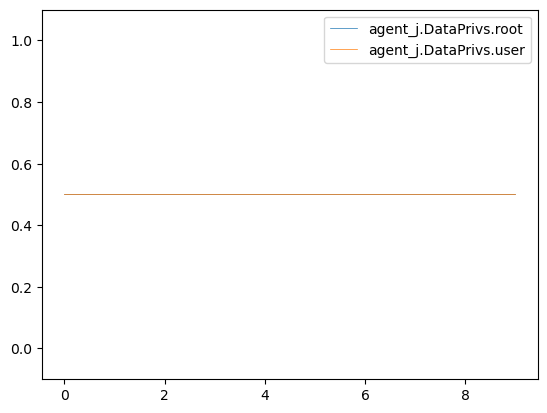

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

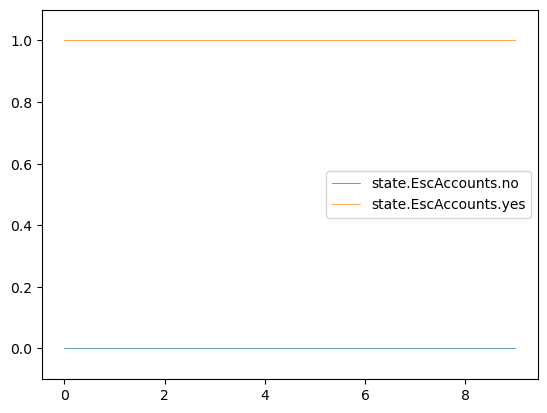

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

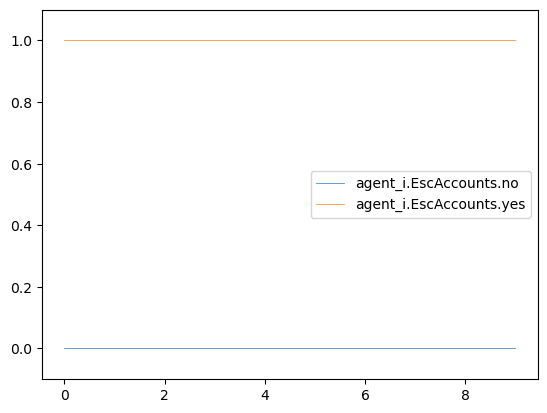

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0  ManipulateData   
4                     0.0                      1.0            Exit   
5                     0.0                      1.0             Nop   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

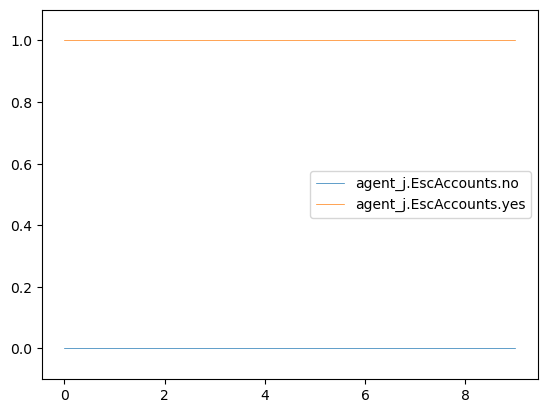

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

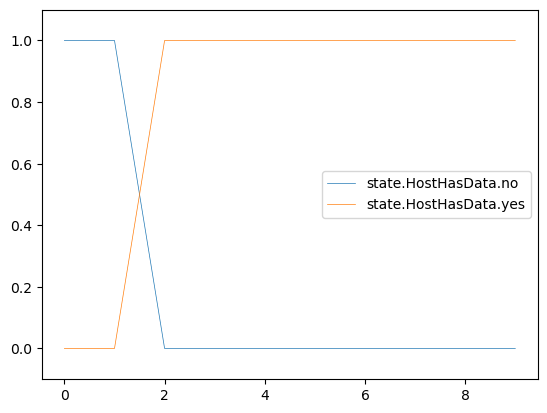

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

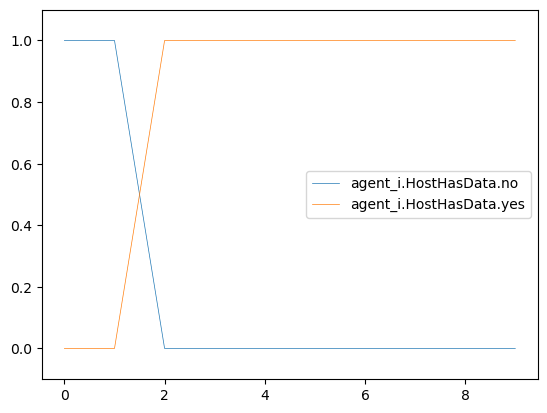

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.338710                 0.661290       FileRecon   
3                0.063439                 0.936561  ManipulateData   
4                0.000070                 0.999930            Exit   
5                0.000070                 0.999930             Nop   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

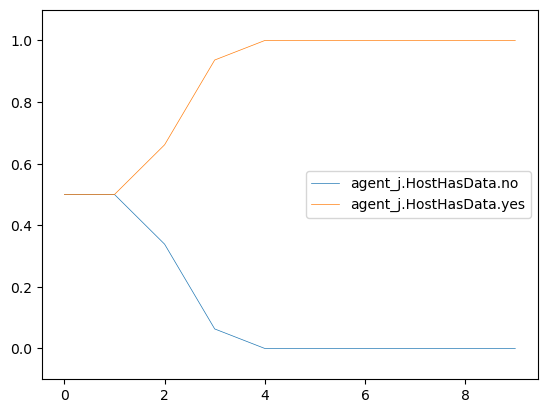

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop  ManipulateData
4                0.0                 1.0               Nop            Exit
5                0.0                 1.0               Nop             Nop
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

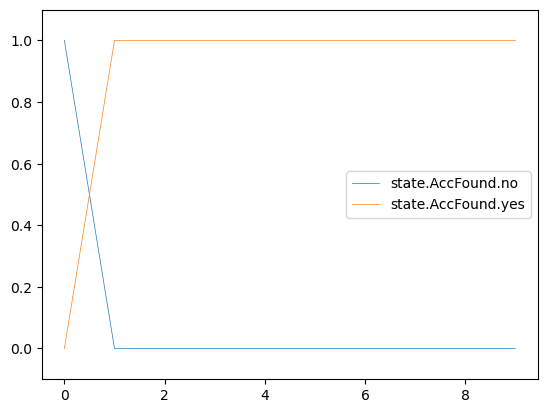

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.133750              0.866250  DeployDataDecoys   
2             0.029800              0.970200               Nop   
3             0.029800              0.970200               Nop   
4             0.005073              0.994927               Nop   
5             0.004036              0.995964               Nop   
6             0.004052              0.995948               Nop   
7             0.004052              0.995948               Nop   
8             0.004052              0.995948               Nop   
9             0.004052              0.995948               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

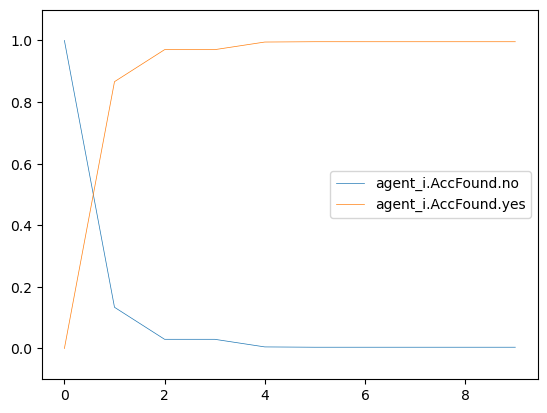

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000    EnumAccounts   
1         1.121076e-03              0.998879      PrivEscAcc   
2         1.123457e-06              0.999999       FileRecon   
3         6.684578e-07              0.999999  ManipulateData   
4         5.618459e-07              0.999999            Exit   
5         5.618459e-07              0.999999             Nop   
6         5.618459e-07              0.999999             Nop   
7         5.618459e-07              0.999999             Nop   
8         5.618459e-07              0.999999             Nop   
9         5.618459e-07              0.999999             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

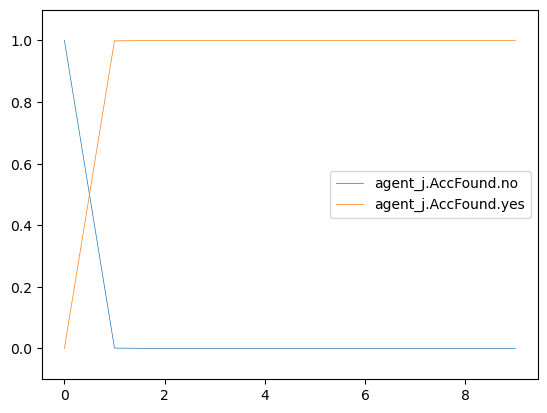

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

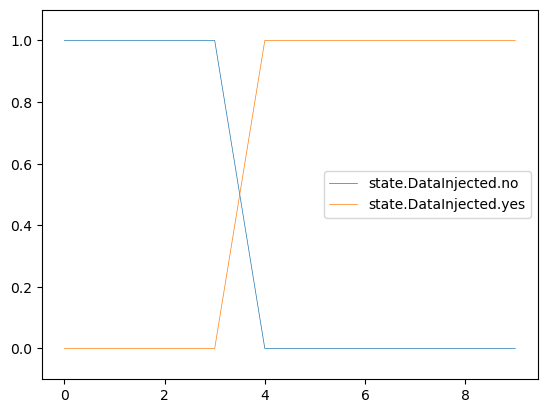

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.079751                  0.920250               Nop   
5                 0.010051                  0.989949               Nop   
6                 0.004618                  0.995382               Nop   
7                 0.004423                  0.995577               Nop   
8                 0.004419                  0.995581               Nop   
9                 0.004417                  0.995583               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                       file_write  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

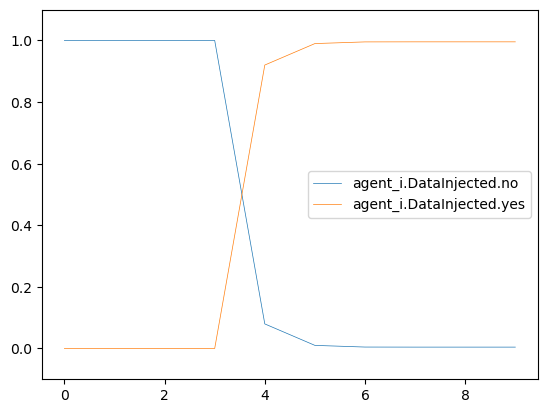

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000  ManipulateData   
4                 0.000097                  0.999903            Exit   
5                 0.000097                  0.999903             Nop   
6                 0.000097                  0.999903             Nop   
7                 0.000097                  0.999903             Nop   
8                 0.000097                  0.999903             Nop   
9                 0.000097                  0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1  DeployDataDecoys                   user_files   
2               Nop                         none   
3               Nop                   user_files   
4               Nop                   user_files   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

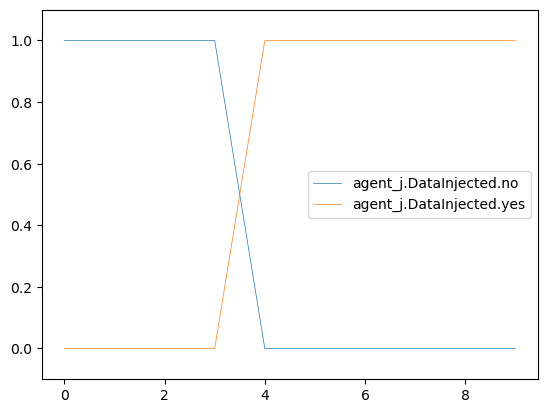

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

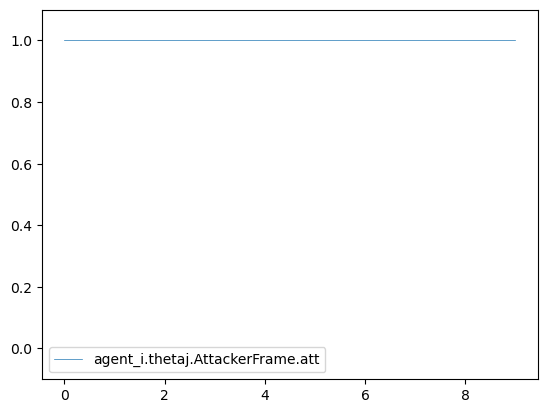

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.354839                        0.645161   
3                         0.186422                        0.813578   
4                         0.063993                        0.936007   
5                         0.263463                        0.736537   
6                         0.013287                        0.986713   
7                         0.013287                        0.986713   
8                         0.013287                        0.986713   
9                         0.013287                        0.986713   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

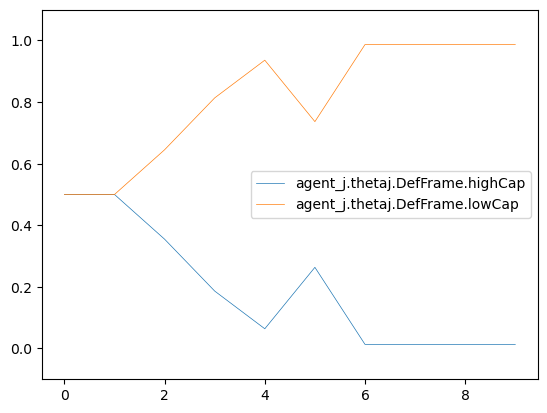

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

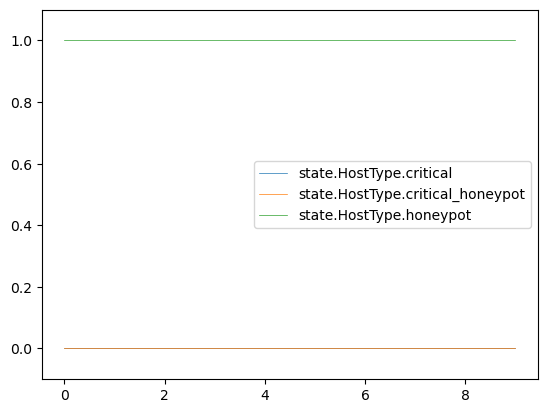

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                        file_enum  
4                       file_write  
5                        file_enum  
6                             none  
7                             none  
8                             none  
9                        file_enum

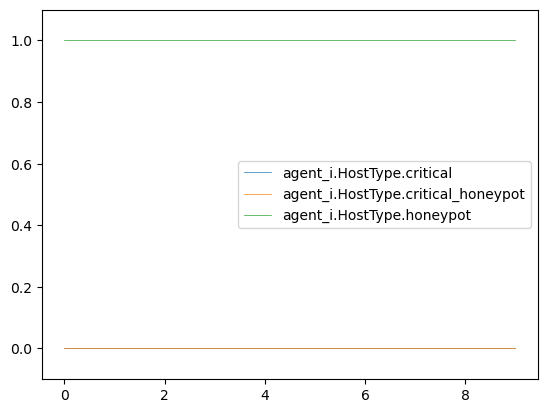

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc  DeployDataDecoys   
2                        0.0       FileRecon               Nop   
3                        0.0       FileRecon               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

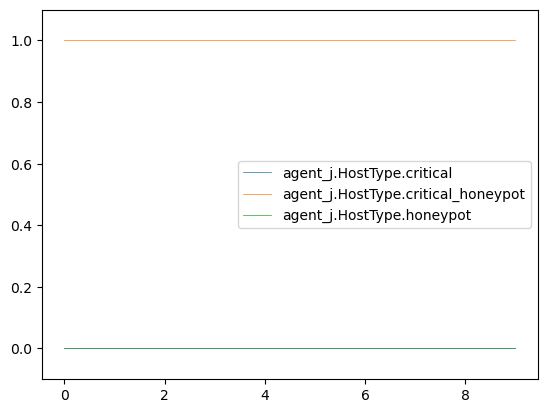

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 1.0                  0.0               Nop  ManipulateData
6                 1.0                  0.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

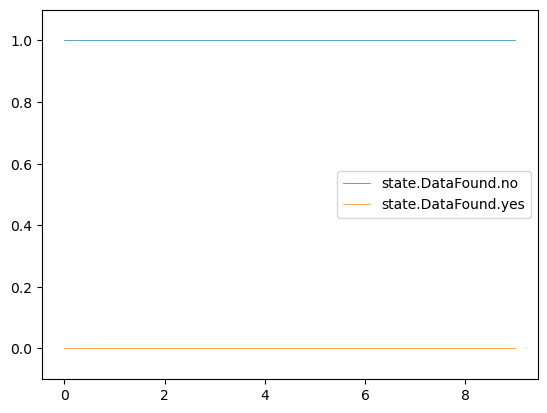

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.901000               0.099000               Nop   
4              0.764115               0.235885               Nop   
5              0.402194               0.597807               Nop   
6              0.376109               0.623891               Nop   
7              0.395388               0.604612               Nop   
8              0.395515               0.604485               Nop   
9              0.395519               0.604481               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

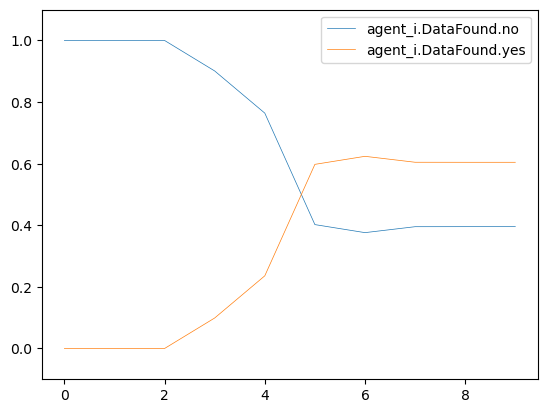

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.887502               0.112498       FileRecon   
4              0.951390               0.048610       FileRecon   
5              0.486789               0.513211  ManipulateData   
6              0.998946               0.001054            Exit   
7              0.998946               0.001054             Nop   
8              0.998946               0.001054             Nop   
9              0.998946               0.001054             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

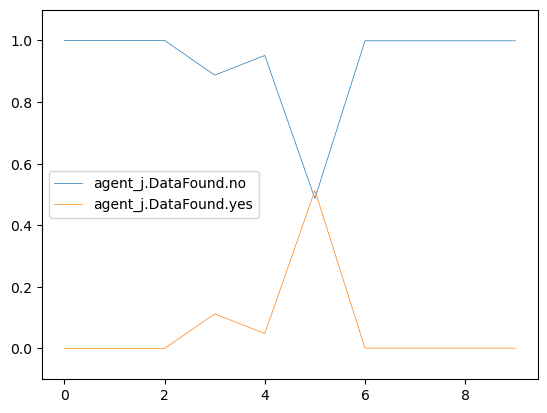

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

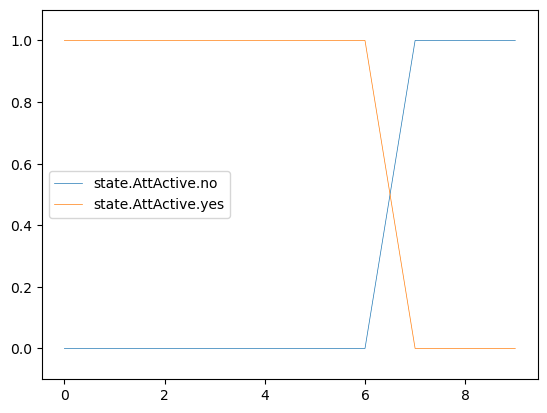

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000               0.500000               Nop   
1              0.125000               0.875000  DeployDataDecoys   
2              0.500000               0.500000               Nop   
3              0.875000               0.125000               Nop   
4              0.729288               0.270712               Nop   
5              0.425563               0.574437               Nop   
6              0.893101               0.106899               Nop   
7              0.988762               0.011238               Nop   
8              0.999855               0.000145               Nop   
9              0.999994               0.000006               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

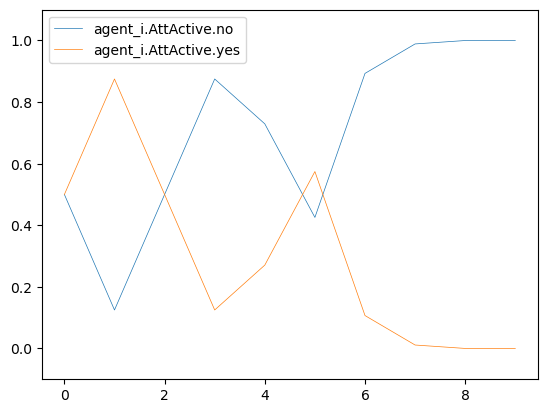

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

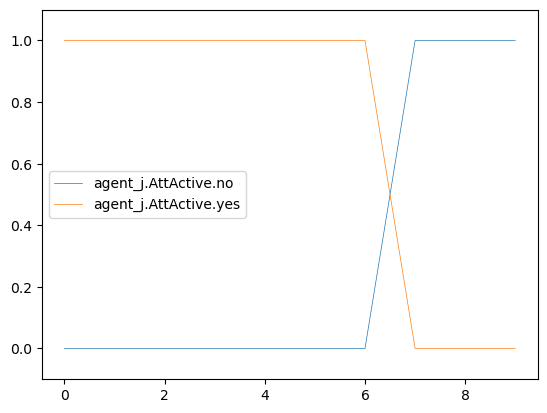

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

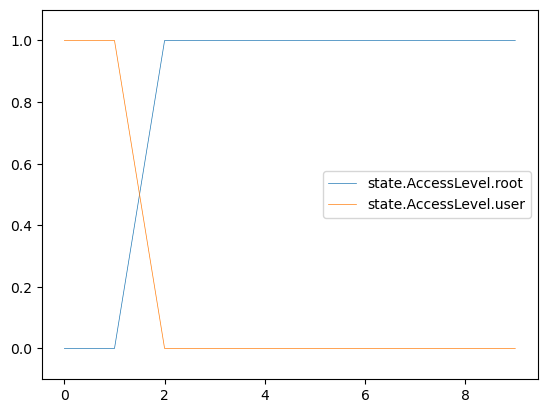

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000  DeployDataDecoys   
2                  0.495000                  0.505000               Nop   
3                  0.123750                  0.876250               Nop   
4                  0.264044                  0.735956               Nop   
5                  0.613636                  0.386364               Nop   
6                  0.643457                  0.356543               Nop   
7                  0.619624                  0.380376               Nop   
8                  0.619326                  0.380674               Nop   
9                  0.619314                  0.380686               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

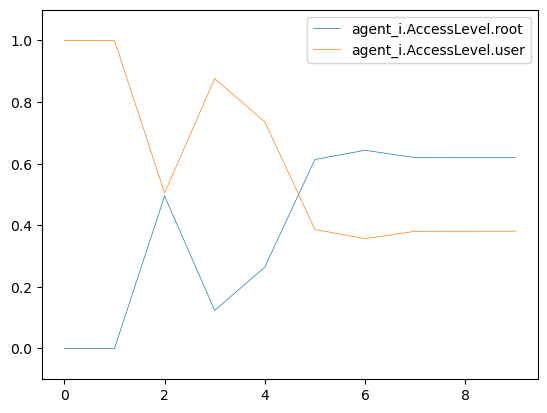

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000    EnumAccounts   
1                  0.000000                  1.000000      PrivEscAcc   
2                  0.999999                  0.000001       FileRecon   
3                  0.999998                  0.000002       FileRecon   
4                  0.999998                  0.000002       FileRecon   
5                  0.999999                  0.000001  ManipulateData   
6                  0.999998                  0.000002            Exit   
7                  0.999998                  0.000002             Nop   
8                  0.999998                  0.000002             Nop   
9                  0.999998                  0.000002             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

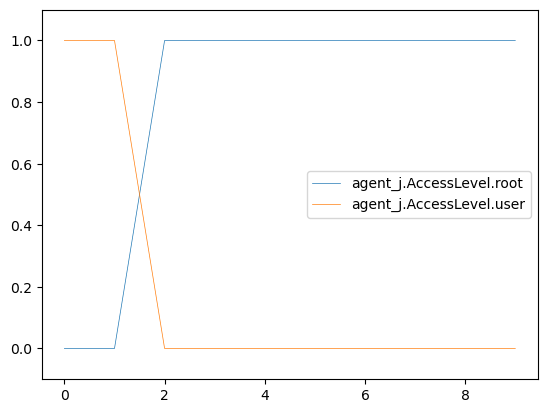

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

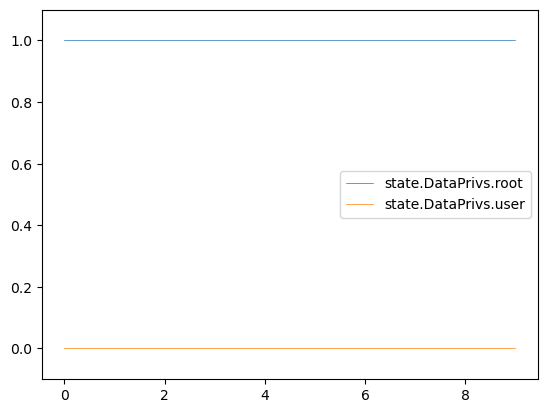

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

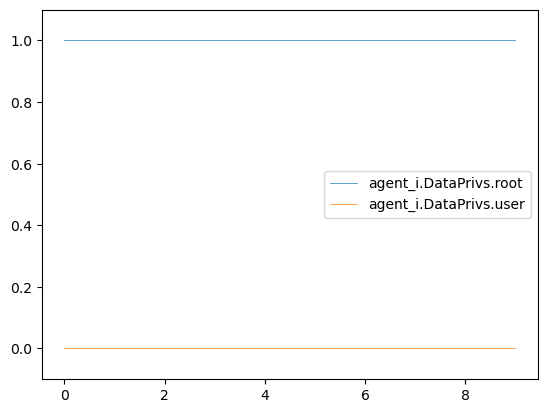

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000    EnumAccounts   
1                0.500000                0.500000      PrivEscAcc   
2                0.500000                0.500000       FileRecon   
3                0.500000                0.500000       FileRecon   
4                0.500000                0.500000       FileRecon   
5                0.500000                0.500000  ManipulateData   
6                0.500001                0.499999            Exit   
7                0.500001                0.499999             Nop   
8                0.500001                0.499999             Nop   
9                0.500001                0.499999             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

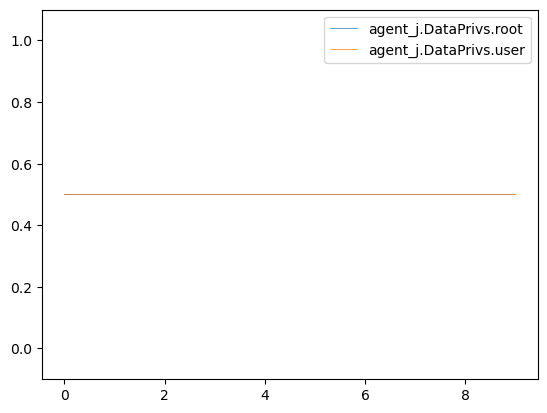

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

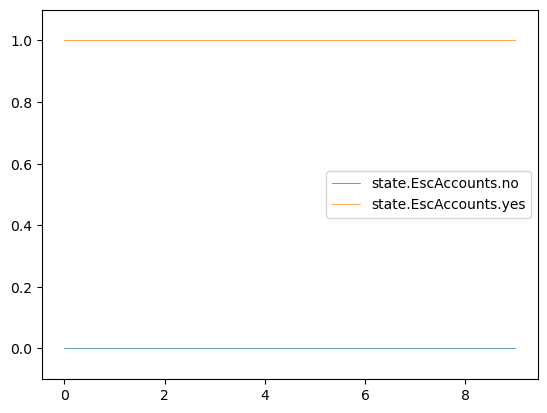

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

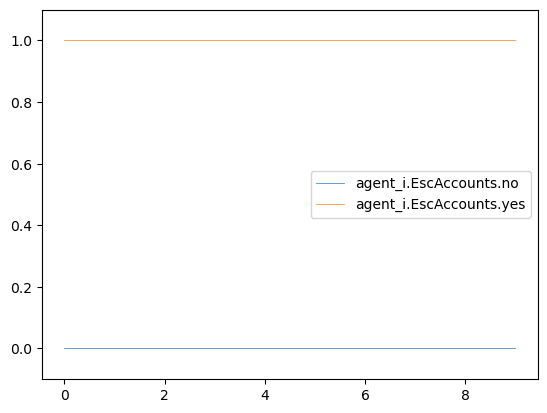

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0       FileRecon   
5                     0.0                      1.0  ManipulateData   
6                     0.0                      1.0            Exit   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

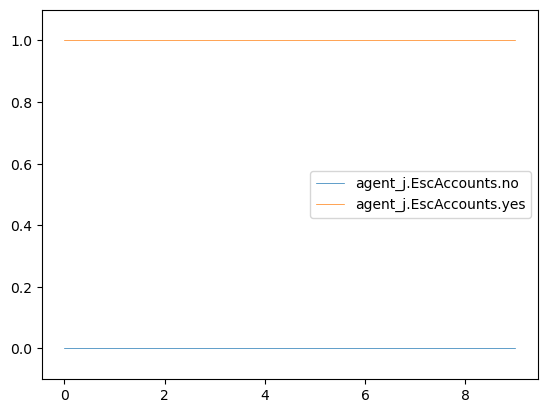

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

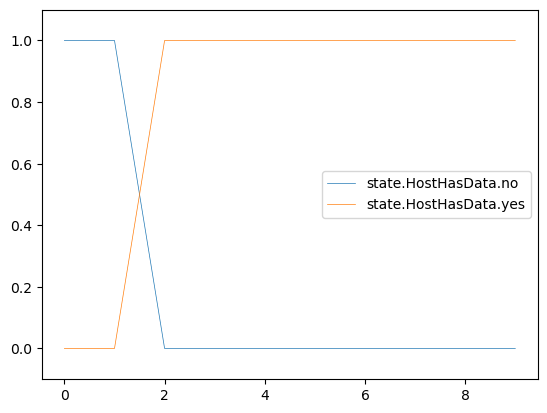

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

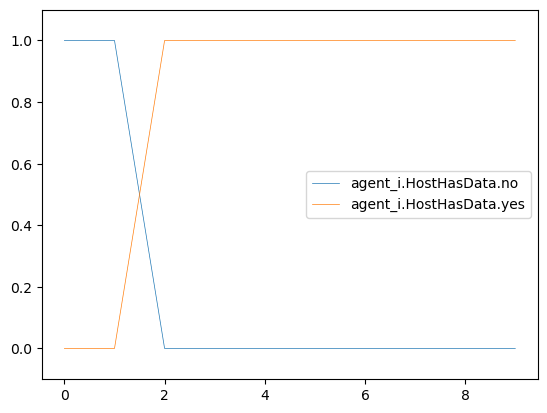

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.338710                 0.661290       FileRecon   
3                0.634380                 0.365620       FileRecon   
4                0.881078                 0.118922       FileRecon   
5                0.479141                 0.520859  ManipulateData   
6                0.983252                 0.016748            Exit   
7                0.983252                 0.016748             Nop   
8                0.983252                 0.016748             Nop   
9                0.983252                 0.016748             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

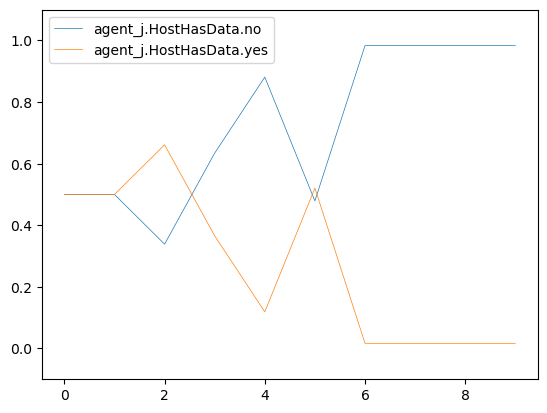

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

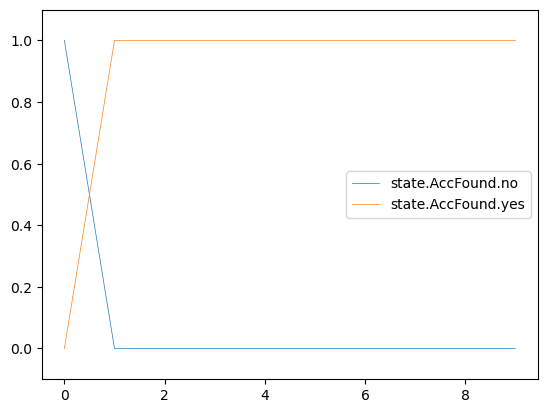

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.133750              0.866250  DeployDataDecoys   
2             0.505000              0.495000               Nop   
3             0.876250              0.123750               Nop   
4             0.729465              0.270535               Nop   
5             0.386309              0.613691               Nop   
6             0.356543              0.643457               Nop   
7             0.380345              0.619655               Nop   
8             0.380673              0.619327               Nop   
9             0.380686              0.619314               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

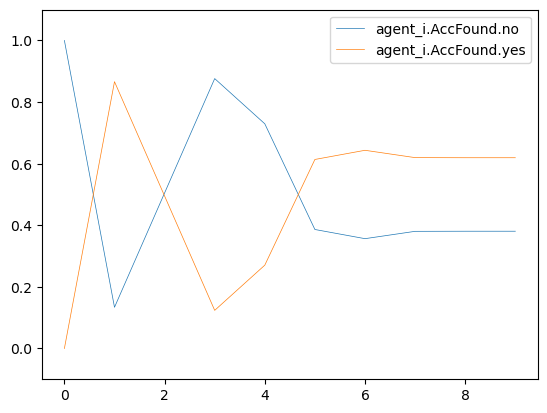

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000    EnumAccounts   
1             0.001121              0.998879      PrivEscAcc   
2             0.000001              0.999999       FileRecon   
3             0.000002              0.999998       FileRecon   
4             0.000002              0.999998       FileRecon   
5             0.000001              0.999999  ManipulateData   
6             0.000002              0.999998            Exit   
7             0.000002              0.999998             Nop   
8             0.000002              0.999998             Nop   
9             0.000002              0.999998             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

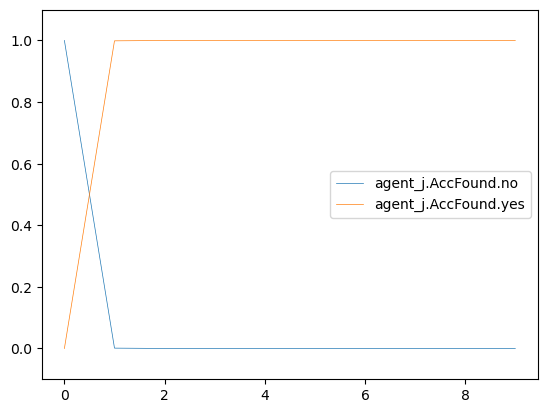

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

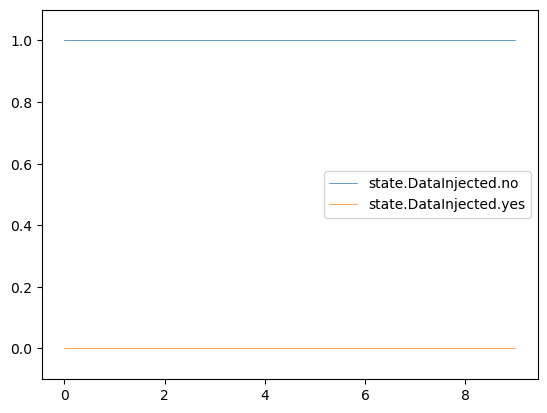

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.925738                  0.074262               Nop   
5                 0.421556                  0.578444               Nop   
6                 0.447381                  0.552619               Nop   
7                 0.403461                  0.596539               Nop   
8                 0.402842                  0.597158               Nop   
9                 0.402818                  0.597182               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                             none  
2       FileRecon                             none  
3       FileRecon                        file_enum  
4       FileRecon                       file_write  
5  ManipulateData                        file_enum  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

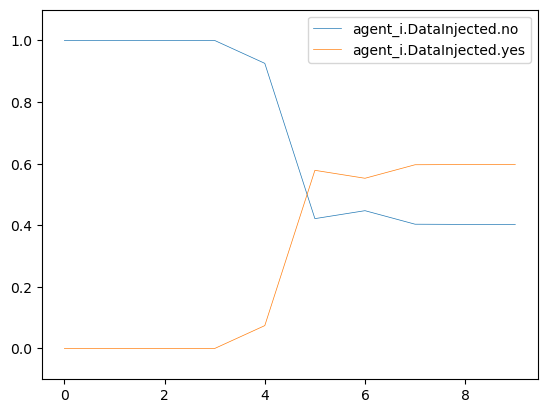

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.998946                  0.001054            Exit   
7                 0.998946                  0.001054             Nop   
8                 0.998946                  0.001054             Nop   
9                 0.998946                  0.001054             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1  DeployDataDecoys                   user_files   
2               Nop                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           failure                       active  
4                           success                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

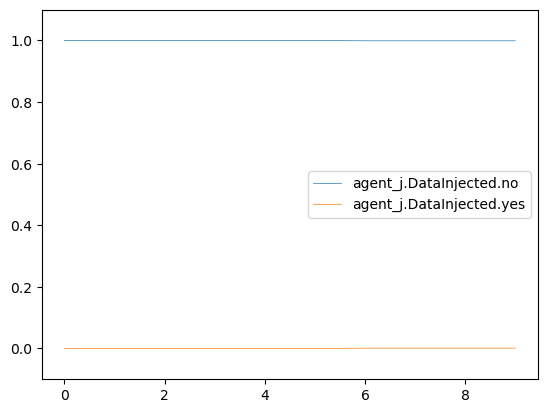

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

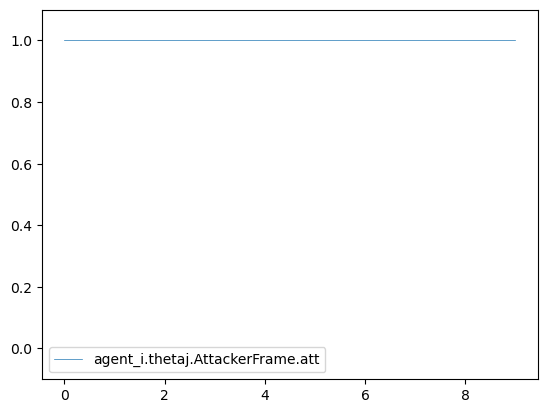

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.354839                        0.645161   
3                         0.186422                        0.813578   
4                         0.411807                        0.588193   
5                         0.501136                        0.498864   
6                         0.501136                        0.498864   
7                         0.501136                        0.498864   
8                         0.501136                        0.498864   
9                         0.501136                        0.498864   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

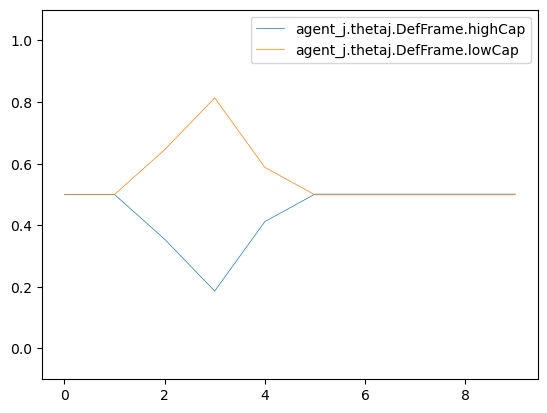

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop    EnumAccounts  
1                      1.0               Nop      PrivEscAcc  
2                      1.0  DeployDataDecoys       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

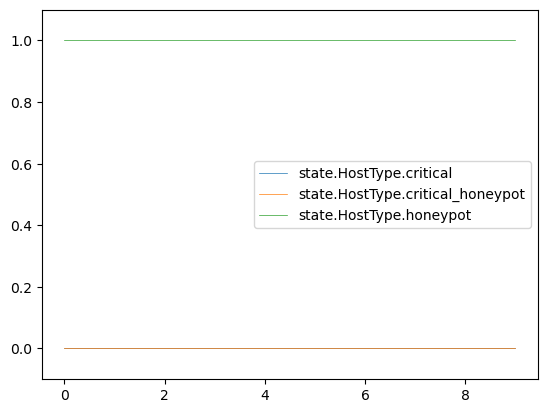

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop    EnumAccounts   
1                        1.0               Nop      PrivEscAcc   
2                        1.0  DeployDataDecoys       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                         su_login  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                        file_enum

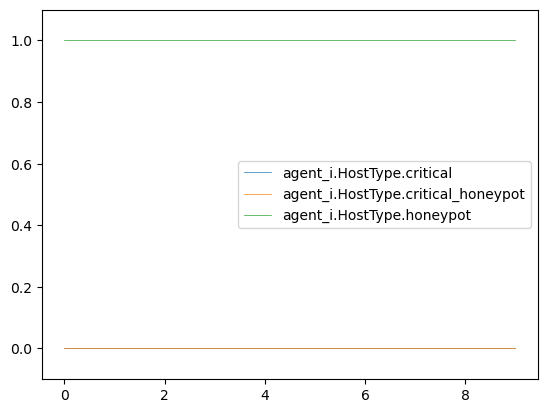

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0    EnumAccounts               Nop   
1                        0.0      PrivEscAcc               Nop   
2                        0.0       FileRecon  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

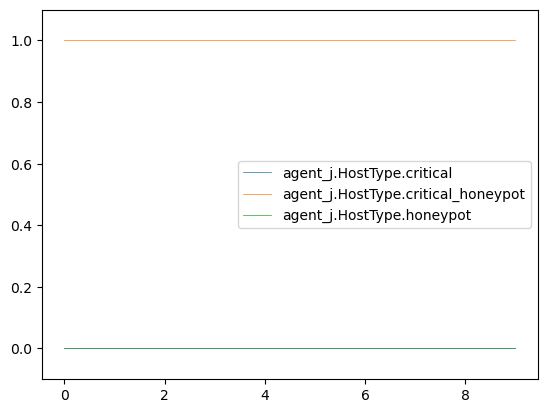

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop    EnumAccounts
1                 1.0                  0.0               Nop      PrivEscAcc
2                 1.0                  0.0  DeployDataDecoys       FileRecon
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

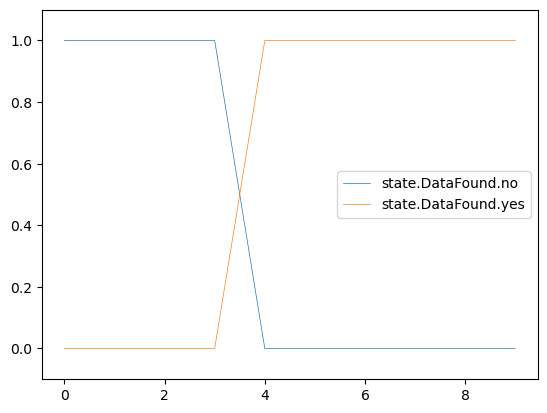

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.238160               0.761840               Nop   
5              0.038872               0.961128               Nop   
6              0.011706               0.988294               Nop   
7              0.011599               0.988402               Nop   
8              0.011596               0.988404               Nop   
9              0.011596               0.988404               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

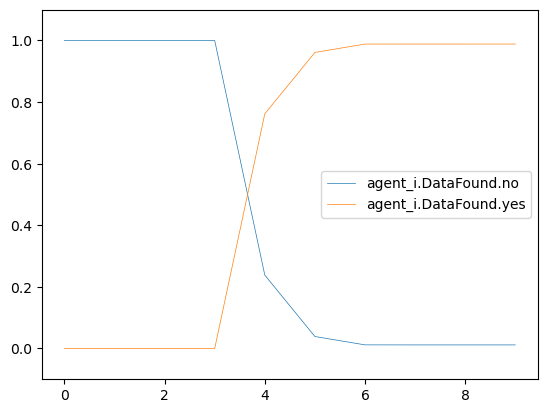

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.887502               0.112498       FileRecon   
4              0.194606               0.805394  ManipulateData   
5              0.000242               0.999758            Exit   
6              0.000242               0.999758             Nop   
7              0.000242               0.999758             Nop   
8              0.000242               0.999758             Nop   
9              0.000242               0.999758             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

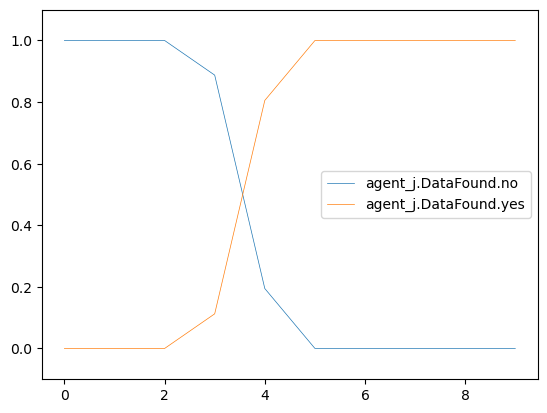

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop    EnumAccounts
1                 0.0                  1.0               Nop      PrivEscAcc
2                 0.0                  1.0  DeployDataDecoys       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

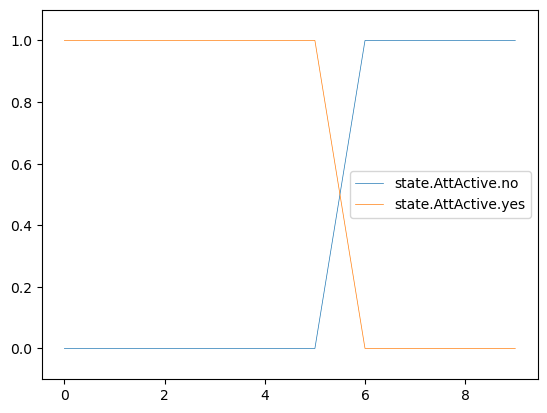

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000           5.000000e-01               Nop   
1              0.875000           1.250000e-01               Nop   
2              0.500000           5.000000e-01  DeployDataDecoys   
3              0.125000           8.749999e-01               Nop   
4              0.021834           9.781660e-01               Nop   
5              0.004179           9.958209e-01               Nop   
6              0.989569           1.043053e-02               Nop   
7              0.999513           4.868353e-04               Nop   
8              0.999998           2.042861e-06               Nop   
9              1.000000           7.347930e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

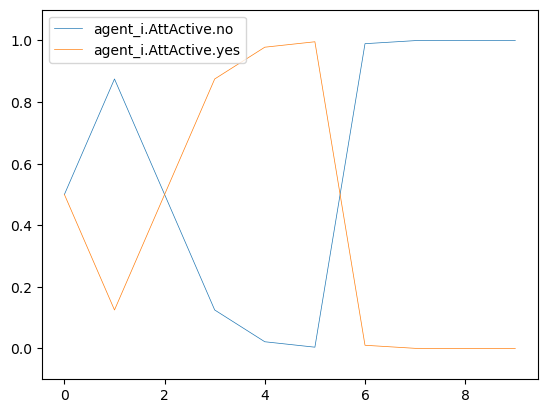

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

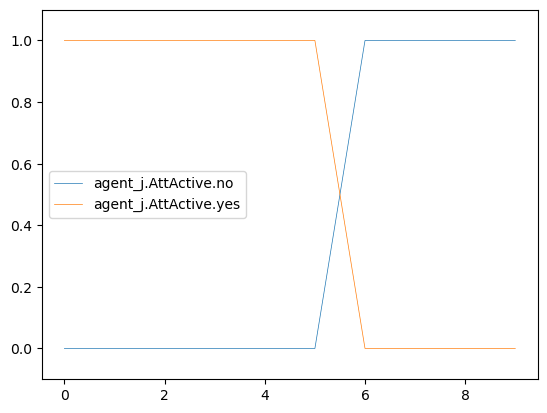

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

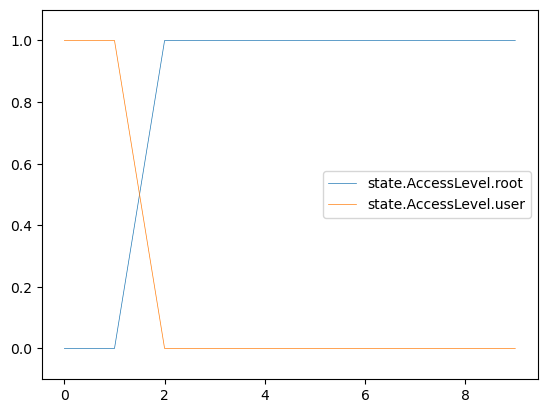

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.495000                  0.505000  DeployDataDecoys   
3                  0.866250                  0.133750               Nop   
4                  0.968384                  0.031616               Nop   
5                  0.995773                  0.004227               Nop   
6                  0.995558                  0.004442               Nop   
7                  0.995547                  0.004453               Nop   
8                  0.995548                  0.004452               Nop   
9                  0.995548                  0.004452               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

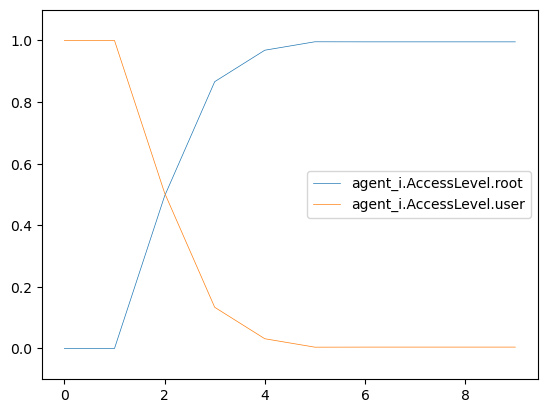

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00    EnumAccounts   
1                  0.000000              1.000000e+00      PrivEscAcc   
2                  0.999999              1.123457e-06       FileRecon   
3                  0.999998              1.629004e-06       FileRecon   
4                  0.999999              8.649354e-07  ManipulateData   
5                  0.999999              5.621055e-07            Exit   
6                  0.999999              5.621055e-07             Nop   
7                  0.999999              5.621055e-07             Nop   
8                  0.999999              5.621055e-07             Nop   
9                  0.999999              5.621055e-07             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

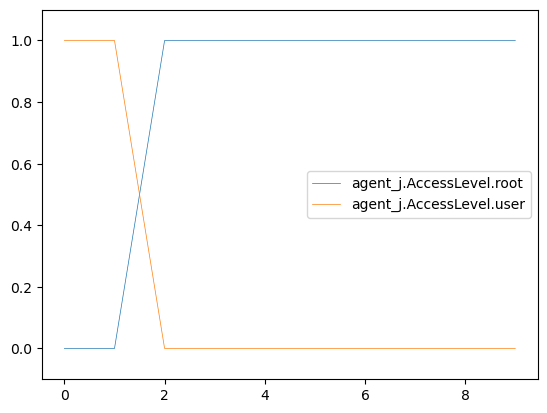

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

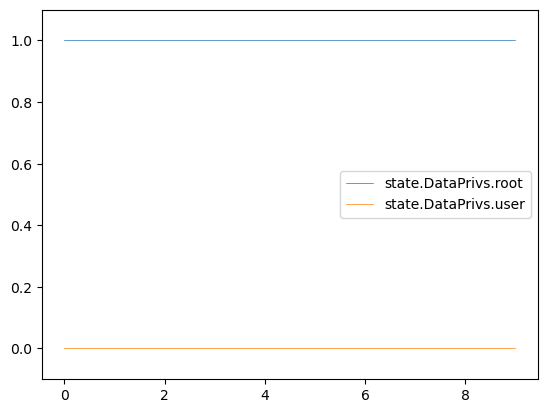

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

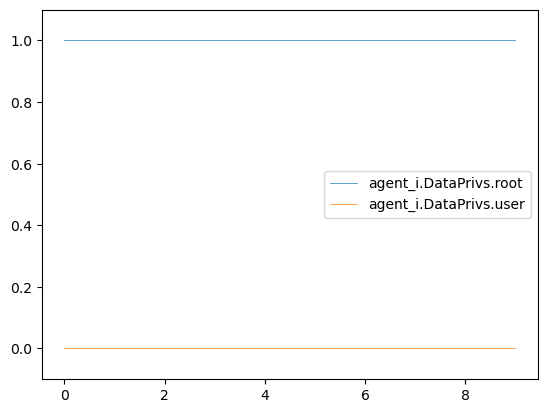

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                     0.5                     0.5    EnumAccounts   
1                     0.5                     0.5      PrivEscAcc   
2                     0.5                     0.5       FileRecon   
3                     0.5                     0.5       FileRecon   
4                     0.5                     0.5  ManipulateData   
5                     0.5                     0.5            Exit   
6                     0.5                     0.5             Nop   
7                     0.5                     0.5             Nop   
8                     0.5                     0.5             Nop   
9                     0.5                     0.5             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

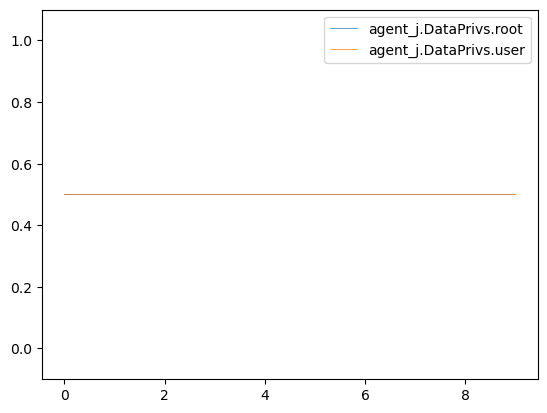

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

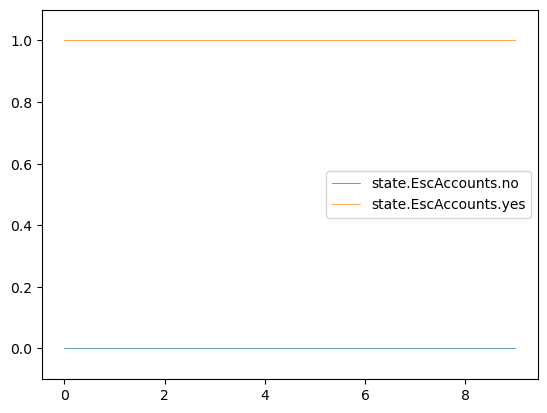

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

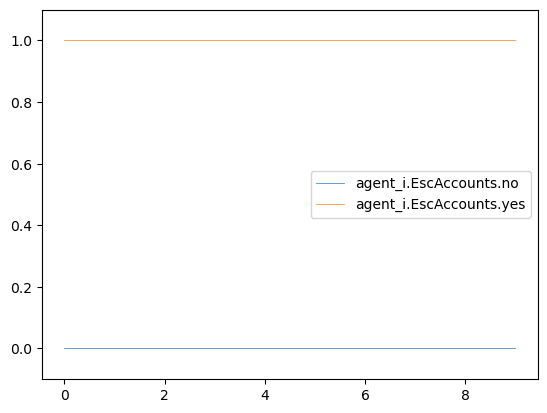

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

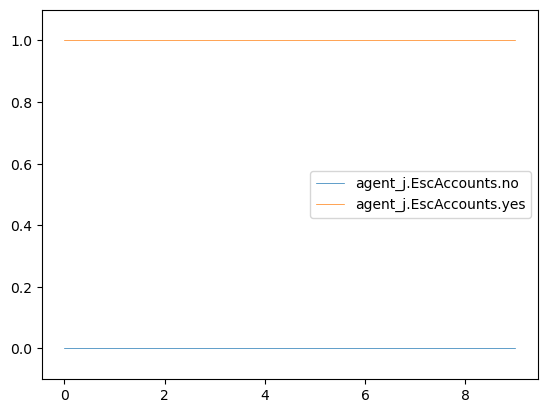

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

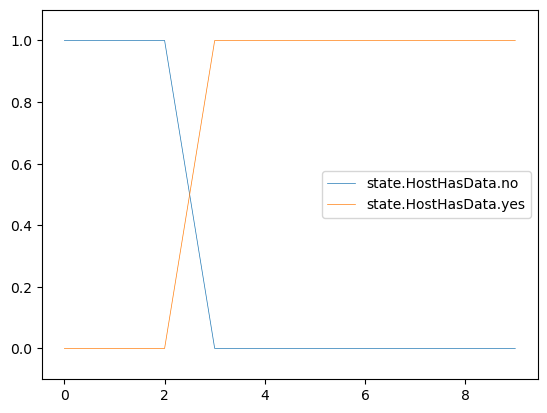

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

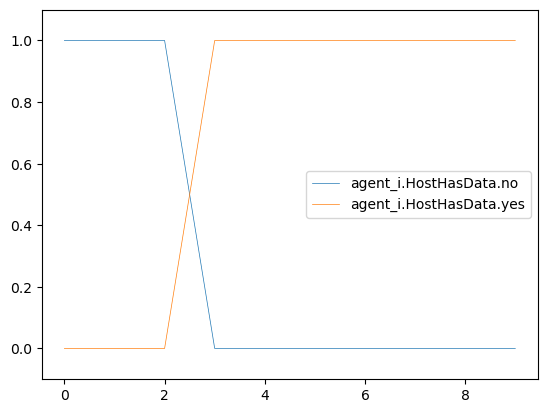

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.500000                 0.500000      PrivEscAcc   
2                0.338710                 0.661290       FileRecon   
3                0.634380                 0.365620       FileRecon   
4                0.180224                 0.819776  ManipulateData   
5                0.000224                 0.999776            Exit   
6                0.000224                 0.999776             Nop   
7                0.000224                 0.999776             Nop   
8                0.000224                 0.999776             Nop   
9                0.000224                 0.999776             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

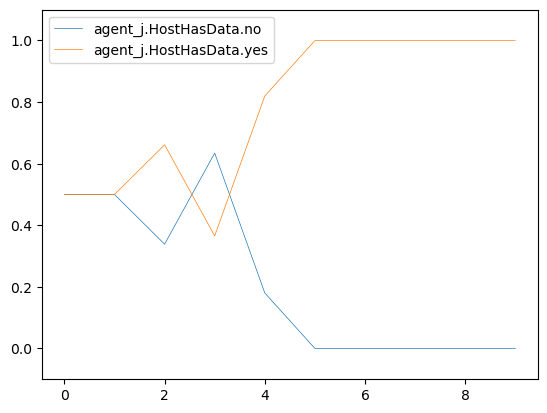

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop    EnumAccounts
1                0.0                 1.0               Nop      PrivEscAcc
2                0.0                 1.0  DeployDataDecoys       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

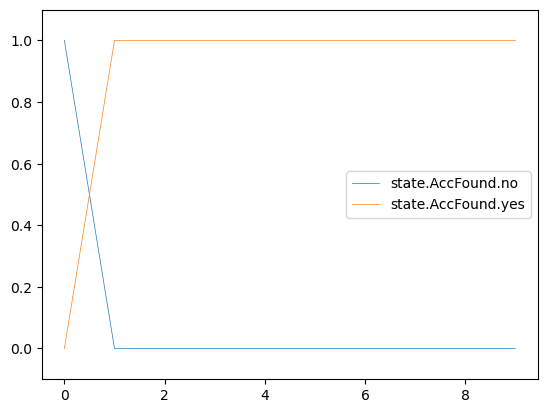

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             0.876250              0.123750               Nop   
2             0.505000              0.495000  DeployDataDecoys   
3             0.133750              0.866250               Nop   
4             0.022093              0.977907               Nop   
5             0.004198              0.995802               Nop   
6             0.004442              0.995558               Nop   
7             0.004452              0.995548               Nop   
8             0.004452              0.995548               Nop   
9             0.004452              0.995548               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

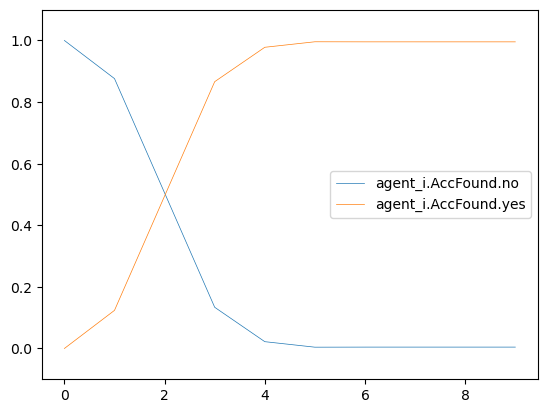

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000    EnumAccounts   
1         1.121076e-03              0.998879      PrivEscAcc   
2         1.123457e-06              0.999999       FileRecon   
3         1.629004e-06              0.999998       FileRecon   
4         8.649354e-07              0.999999  ManipulateData   
5         5.621055e-07              0.999999            Exit   
6         5.621055e-07              0.999999             Nop   
7         5.621055e-07              0.999999             Nop   
8         5.621055e-07              0.999999             Nop   
9         5.621055e-07              0.999999             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

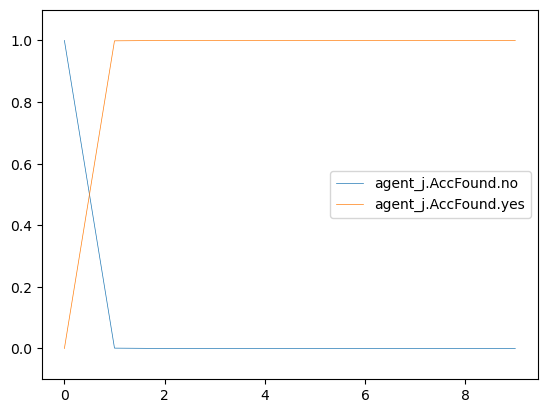

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

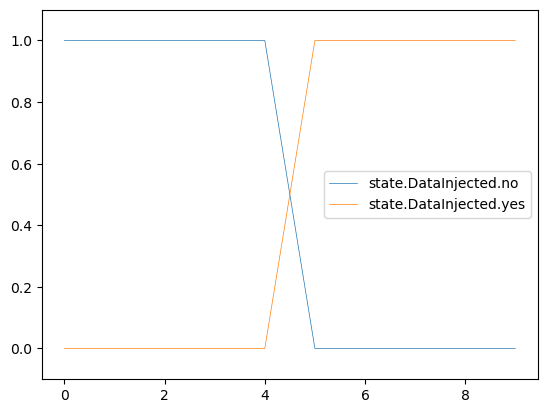

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.081983                  0.918017               Nop   
6                 0.019477                  0.980523               Nop   
7                 0.016278                  0.983722               Nop   
8                 0.016265                  0.983735               Nop   
9                 0.016264                  0.983736               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

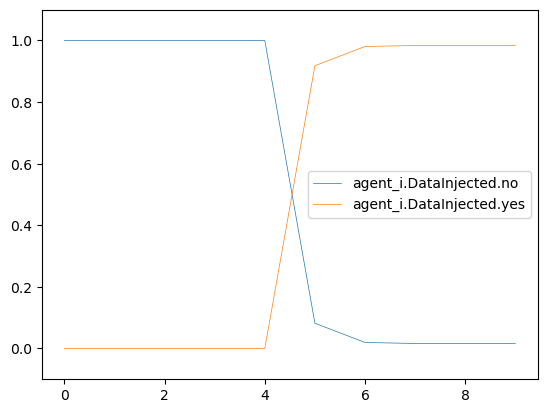

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000242                  0.999758            Exit   
6                 0.000242                  0.999758             Nop   
7                 0.000242                  0.999758             Nop   
8                 0.000242                  0.999758             Nop   
9                 0.000242                  0.999758             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

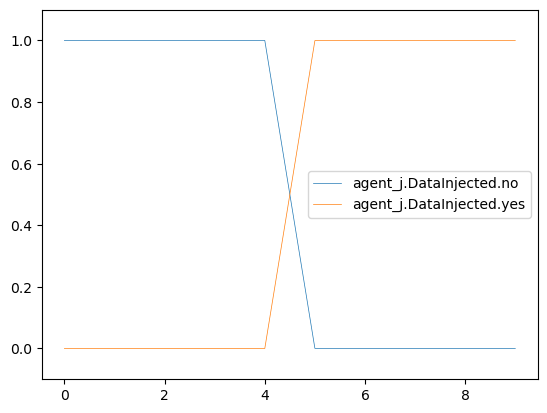

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        # if var != "HostType":
        #     continue
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)
    